In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
# plt 한국어 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (4,191 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/프로그래밍 언어 공부 자료/인공지능/2022 데청캠/기업 프로젝트/데이터/최종 데이터셋(원본에서 포인트 찾기 위한 파일).xlsx")
df

,Unnamed: 0,Unnamed: 0.1,LOTID,공정(번호),시차(초),개수,총 리드타임,날짜,품명(코드화),품명,전체공정,고객사
0,0.0,0.0,N1803120140100,5166.666667,5.778593e+05,50.0,11557.186667,2018-05-10 11:03:22.407,BU-TCS-11940-00-0-04,Triton Ch Slid Lift Base Under AL6061각재,MCT > 후처리 > 입고처리,BU
1,1.0,1.0,N1803120180100,4375.000000,6.318738e+05,50.0,12637.475000,2018-10-17 15:38:19.880,BU-TCS-11940-00-0-10,Triton Ch Slid Worm Cover-4 AL6061봉재,CNC > MCT > 후처리 > 입고처리,BU
2,2.0,2.0,N1803140150100,2500.000000,3.052445e+05,15.0,20349.635000,2018-05-24 13:42:27.630,BU-BNR-12841-00-2-04,BURNER COOLING COVER SUS 304 FLANGE,CNC > MCT > 세정 > 입고처리,BU
3,3.0,3.0,N1803140150200,2500.000000,3.049215e+05,7.0,43560.215000,2018-05-24 13:42:41.740,BU-BNR-12841-00-2-04,BURNER COOLING COVER SUS 304 FLANGE,CNC > MCT > 세정 > 입고처리,BU
4,4.0,4.0,N1804030040100,3666.666667,1.152435e+06,30.0,38414.490000,2018-05-30 09:52:43.887,BU-TCS-11940-00-0-08,Triton Ch Slid Worm Cover-2 AL6061봉재,CNC > MCT > 후처리 > 입고처리,BU
...,...,...,...,...,...,...,...,...,...,...,...,...
36334,36334.0,36464.0,N2204270350100,3000.000000,1.633000e+03,6.0,272.170000,2022-04-28 14:57:19.157,BU-BLD-23060-00-1-01,BLADE,MCT > 입고처리,BU
36335,36335.0,36465.0,N2204270370100,3000.000000,2.061800e+04,120.0,171.820000,2022-05-03 08:49:49.777,AY-KSW-SRING-00-0-02,SUS RING-2,CNC > 세정 > 입고처리,AY
36336,36336.0,36466.0,N2204270830100,5000.000000,2.975200e+04,16.0,1859.500000,2022-05-02 21:51:57.030,BU-KSW-GHUD0-00-1,GEAR UNDER HOUSING ASSY-W,용접 > 후처리 > 입고처리,BU
36337,36337.0,36467.0,N2204270840100,5000.000000,2.974500e+04,16.0,1859.060000,2022-05-02 21:52:04.607,BU-KSW-GHUP0-00-1,GEAR UPPER HOUSING ASSY-W,용접 > 후처리 > 입고처리,BU


In [ ]:
df = df.drop("Unnamed: 0.1", axis = 1)
df

,Unnamed: 0,LOTID,공정(번호),시차(초),개수,총 리드타임,날짜,품명(코드화),품명,전체공정,고객사
0,0.0,N1803120140100,5166.666667,5.778593e+05,50.0,11557.186667,2018-05-10 11:03:22.407,BU-TCS-11940-00-0-04,Triton Ch Slid Lift Base Under AL6061각재,MCT > 후처리 > 입고처리,BU
1,1.0,N1803120180100,4375.000000,6.318738e+05,50.0,12637.475000,2018-10-17 15:38:19.880,BU-TCS-11940-00-0-10,Triton Ch Slid Worm Cover-4 AL6061봉재,CNC > MCT > 후처리 > 입고처리,BU
2,2.0,N1803140150100,2500.000000,3.052445e+05,15.0,20349.635000,2018-05-24 13:42:27.630,BU-BNR-12841-00-2-04,BURNER COOLING COVER SUS 304 FLANGE,CNC > MCT > 세정 > 입고처리,BU
3,3.0,N1803140150200,2500.000000,3.049215e+05,7.0,43560.215000,2018-05-24 13:42:41.740,BU-BNR-12841-00-2-04,BURNER COOLING COVER SUS 304 FLANGE,CNC > MCT > 세정 > 입고처리,BU
4,4.0,N1804030040100,3666.666667,1.152435e+06,30.0,38414.490000,2018-05-30 09:52:43.887,BU-TCS-11940-00-0-08,Triton Ch Slid Worm Cover-2 AL6061봉재,CNC > MCT > 후처리 > 입고처리,BU
...,...,...,...,...,...,...,...,...,...,...,...
36334,36334.0,N2204270350100,3000.000000,1.633000e+03,6.0,272.170000,2022-04-28 14:57:19.157,BU-BLD-23060-00-1-01,BLADE,MCT > 입고처리,BU
36335,36335.0,N2204270370100,3000.000000,2.061800e+04,120.0,171.820000,2022-05-03 08:49:49.777,AY-KSW-SRING-00-0-02,SUS RING-2,CNC > 세정 > 입고처리,AY
36336,36336.0,N2204270830100,5000.000000,2.975200e+04,16.0,1859.500000,2022-05-02 21:51:57.030,BU-KSW-GHUD0-00-1,GEAR UNDER HOUSING ASSY-W,용접 > 후처리 > 입고처리,BU
36337,36337.0,N2204270840100,5000.000000,2.974500e+04,16.0,1859.060000,2022-05-02 21:52:04.607,BU-KSW-GHUP0-00-1,GEAR UPPER HOUSING ASSY-W,용접 > 후처리 > 입고처리,BU


# => 총 리드타임(종속변수)을 보면

In [ ]:
# groupby
df['총 리드타임'].groupby(df['전체공정']).describe() # 대표치가 평균이 아니고 50%

,count,mean,std,min,25%,50%,75%,max
전체공정,,,,,,,,
(연구개발) 용접 > 후처리 > 조립 > 품질검사 > 입고처리,13.0,403505.349231,548450.035668,6669.480000,32037.735000,223678.250000,477075.750000,1.577142e+06
CNC > MCT > IPA세정 > 입고처리,42.0,12185.682004,27875.104532,0.143333,895.622500,3706.663333,7972.668542,1.456908e+05
CNC > MCT > 사상 > 세정 > 입고처리,25.0,4250.507700,11799.369558,0.475000,4.075000,137.000000,3076.942500,5.926716e+04
CNC > MCT > 세정 > 입고처리,5423.0,11252.035568,57077.346227,0.020000,110.880000,1983.626667,7208.346667,3.065669e+06
CNC > MCT > 세정 > 타각 > 입고처리,54.0,27977.841898,44571.802618,1.200000,1950.271875,10655.125000,31551.356250,1.743766e+05
...,...,...,...,...,...,...,...,...
용접 > 후처리 > 입고처리,82.0,54864.716463,70264.947436,1797.910000,14595.752500,31043.000000,74296.398750,5.140282e+05
용접 > 후처리 > 품질검사 > 입고처리,6857.0,130754.768668,446952.323596,0.050000,10524.086667,40721.750000,130508.466667,1.449566e+07
후처리 > MCT > 후처리2차 > 입고처리,4.0,211588.139167,244029.462345,27.333333,69231.833333,144564.000000,286920.305833,5.571972e+05


In [ ]:
# 1.

In [ ]:
# 2. 

In [ ]:
# 3. 

# => cnc 사이클 타임(종속변수)을 총 리드타임으로 해보면

In [ ]:
df['총 리드타임'].groupby(df['품명']).describe()

,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
123,5.0,2.640256e+05,1.394753e+05,34163.300000,240172.666667,304245.500000,3.707590e+05,3.707877e+05
(S4120203) - OUTLET Lower Tower (AY-OLT-S0203-00-1) HPS-04,1.0,1.704819e+05,NaN,170481.890000,170481.890000,170481.890000,1.704819e+05,1.704819e+05
240 SCRAPER Ass'y,1.0,2.787347e+05,NaN,278734.666667,278734.666667,278734.666667,2.787347e+05,2.787347e+05
9314-114-960 CYCLONE FAN,1.0,7.283417e+03,NaN,7283.417500,7283.417500,7283.417500,7.283417e+03,7.283417e+03
9319-107-540 HEAT WET SCRAPER ASS`Y,1.0,3.787533e+04,NaN,37875.333333,37875.333333,37875.333333,3.787533e+04,3.787533e+04
...,...,...,...,...,...,...,...,...
"효율개선 HEATING CHAMBER ASSY, CHAMBER INNER TUBE FLANGE, STS304",3.0,8.159283e+03,1.232697e+04,6.100000,1068.800000,2131.500000,1.223588e+04,2.234025e+04
"효율개선 HEATING CHAMBER ASSY, CHAMBER INNER TUBE PIPE STS304",3.0,7.462517e+03,1.288494e+04,6.050000,23.400000,40.750000,1.119075e+04,2.234075e+04
효율개선 HEATING CHAMBER INNER TUBE ASSY-W,1.0,7.192500e+04,NaN,71925.000000,71925.000000,71925.000000,7.192500e+04,7.192500e+04


In [ ]:
# 이상치 기준을 몇으로 잡을까 -> 이거 탑 4기업(AY, BU, DP, KT, ZD)
df[df["총 리드타임"] > 20000000]

,LOTID,공정(번호),시차(초),개수,총 리드타임,날짜,품명(코드화),품명,전체공정
8571,N1912110100101,7500.0,23314371.0,1.0,23314371.0,2021-06-04 08:13:13.627,BU-TCS-11340-00,TOSHIBA Ch Slid Ass'y,수입검사2차(조립자재) > 조립 > 품질검사 > 입고처리


In [ ]:
df[df["품명"] == "TOSHIBA Ch Slid Ass'y"]

,LOTID,공정(번호),시차(초),개수,총 리드타임,날짜,품명(코드화),품명,전체공정
2853,N1811290120100,7000.0,3.520570e+05,1.000000,3.520570e+05,2018-12-07 11:26:07.560,BU-TCS-11340-00,TOSHIBA Ch Slid Ass'y,수입검사2차(조립자재) > 조립 > 품질검사 > 입고처리
7296,N1910080050100,7170.0,4.604313e+05,2.000000,2.302157e+05,2019-10-24 16:40:26.290,BU-TCS-11340-00,TOSHIBA Ch Slid Ass'y,수입검사2차(조립자재) > 조립 > 품질검사 > 입고처리
8570,N1912110100100,7170.0,7.734180e+05,1.333333,7.734023e+05,2020-01-07 11:30:08.860,BU-TCS-11340-00,TOSHIBA Ch Slid Ass'y,수입검사2차(조립자재) > 조립 > 품질검사 > 입고처리
8571,N1912110100101,7500.0,2.331437e+07,1.000000,2.331437e+07,2021-06-04 08:13:13.627,BU-TCS-11340-00,TOSHIBA Ch Slid Ass'y,수입검사2차(조립자재) > 조립 > 품질검사 > 입고처리


In [ ]:
# AY, BU만 본다.
df[(df["총 리드타임"] < 2000000) & (df["총 리드타임"] > 1800000)]

,LOTID,공정(번호),시차(초),개수,총 리드타임,날짜,품명(코드화),품명,전체공정
776,N1810190090100,7000.0,1.822185e+06,1.0,1.822185e+06,2018-11-20 14:19:03.557,BU-BNR-00042-00,GAS BURNER Ass'y,수입검사2차(조립자재) > 조립 > 품질검사 > 입고처리
8770,N2001020020100,6500.0,1.923403e+06,1.0,1.923403e+06,2020-03-09 09:49:49.047,AY-TNK-S0106-04-1,HPS-04R TANK BODY ASSY,용접 > 후처리 > 품질검사 > 입고처리
20600,N2104010040100,5000.0,1.889551e+06,1.0,1.889551e+06,2021-04-23 11:55:07.057,BU-F6S-21300-00-1,9303-121-300 (SK) FILTER 1 6인치 (INSERT) ASSY,용접 > 입고처리
20601,N2104010050100,5000.0,1.889623e+06,1.0,1.889623e+06,2021-04-23 11:56:15.837,BU-F6S-21310-00-1,9303-121-310 (SK) FILTER 2 6인치 (INSERT) ASSY,용접 > 입고처리
23175,N2106010800100,5000.0,3.976224e+06,2.0,1.988112e+06,2021-07-19 19:25:31.023,FH-COL-14912-00-3,ADAPTOR SOCKET ASSY,용접 > 입고처리
27450,N2109030010100,7170.0,1.965712e+06,1.0,1.965712e+06,2021-11-10 17:07:37.080,CB-NPF-01070-00,KPC Tourch N2 Purge Flange A,수입검사2차(조립자재) > 조립 > 품질검사 > 입고처리


In [ ]:
df[df["품명"] == "GAS BURNER Ass'y"]

,LOTID,공정(번호),시차(초),개수,총 리드타임,날짜,품명(코드화),품명,전체공정
321,N1808140010100,7500.0,9.171450e+04,1.0,9.171450e+04,2018-08-16 13:52:45.587,BU-BNR-00042-00,GAS BURNER Ass'y,수입검사2차(조립자재) > 조립 > 품질검사 > 입고처리
336,N1808170030100,7500.0,1.289735e+05,20.0,6.448675e+03,2018-08-20 11:59:30.107,BU-BNR-00042-00,GAS BURNER Ass'y,수입검사2차(조립자재) > 조립 > 품질검사 > 입고처리
358,N1808280070100,7500.0,2.117326e+06,2.0,1.058663e+06,2018-10-16 14:52:01.073,BU-BNR-00042-00,GAS BURNER Ass'y,수입검사2차(조립자재) > 조립 > 품질검사 > 입고처리
372,N1809040010100,7500.0,4.266700e+05,6.0,7.111167e+04,2018-09-14 11:08:10.847,BU-BNR-00042-00,GAS BURNER Ass'y,수입검사2차(조립자재) > 조립 > 품질검사 > 입고처리
708,N1810170040100,7500.0,3.049915e+05,6.0,5.083192e+04,2018-10-24 15:14:30.930,BU-BNR-00042-00,GAS BURNER Ass'y,수입검사2차(조립자재) > 조립 > 품질검사 > 입고처리
776,N1810190090100,7000.0,1.822185e+06,1.0,1.822185e+06,2018-11-20 14:19:03.557,BU-BNR-00042-00,GAS BURNER Ass'y,수입검사2차(조립자재) > 조립 > 품질검사 > 입고처리
3037,N1812140180100,6755.0,8.220505e+05,22.0,3.736593e+04,2019-01-02 12:18:25.243,BU-BNR-00042-00,GAS BURNER Ass'y,수입검사2차(조립자재) > 조립 > 품질검사 > 입고처리
7101,N1909090070100,7170.0,2.052553e+05,4.0,5.131383e+04,2019-09-16 14:50:02.027,BU-BNR-00042-00,GAS BURNER Ass'y,수입검사2차(조립자재) > 조립 > 품질검사 > 입고처리
8012,N1911050770100,7170.0,1.986110e+05,50.0,3.972220e+03,2019-11-15 11:23:13.417,BU-BNR-00042-00,GAS BURNER Ass'y,수입검사2차(조립자재) > 조립 > 품질검사 > 입고처리
9315,N2002120060100,7170.0,2.484631e+06,50.0,4.969262e+04,2020-05-08 16:48:24.613,BU-BNR-00042-00,GAS BURNER Ass'y,수입검사2차(조립자재) > 조립 > 품질검사 > 입고처리


In [ ]:
df[df["품명"] == "HPS-04R TANK BODY ASSY"]

,LOTID,공정(번호),시차(초),개수,총 리드타임,날짜,품명(코드화),품명,전체공정
2774,N1811230140100,5500.000000,1.678745e+05,10.000000,1.678745e+04,2018-11-30 09:44:22.560,AY-TNK-S0106-04-1,HPS-04R TANK BODY ASSY,용접 > 후처리 > 품질검사 > 입고처리
2793,N1811260100100,6500.000000,1.650000e+02,10.000000,1.650000e+01,2018-12-06 17:10:34.533,AY-TNK-S0106-04-1,HPS-04R TANK BODY ASSY,용접 > 후처리 > 품질검사 > 입고처리
3792,N1901280390100,5833.333333,7.717467e+04,5.000000,1.543493e+04,2019-01-31 08:50:03.093,AY-TNK-S0106-04-1,HPS-04R TANK BODY ASSY,용접 > 후처리 > 품질검사 > 입고처리
3809,N1901290130100,5833.333333,7.656300e+04,3.000000,2.552100e+04,2019-02-01 08:37:48.713,AY-TNK-S0106-04-1,HPS-04R TANK BODY ASSY,용접 > 후처리 > 품질검사 > 입고처리
3856,N1901310240100,5833.333333,3.077390e+05,5.000000,6.154780e+04,2019-02-11 08:31:07.567,AY-TNK-S0106-04-1,HPS-04R TANK BODY ASSY,용접 > 후처리 > 품질검사 > 입고처리
4407,N1903200190100,6375.000000,2.781600e+05,3.000000,9.272000e+04,2019-04-02 11:39:07.117,AY-TNK-S0106-04-1,HPS-04R TANK BODY ASSY,용접 > 후처리 > 품질검사 > 입고처리
6191,N1907240100100,6375.000000,2.612288e+05,6.000000,4.353812e+04,2019-08-05 18:19:04.440,AY-TNK-S0106-04-1,HPS-04R TANK BODY ASSY,용접 > 후처리 > 품질검사 > 입고처리
6210,N1907260010100,6500.000000,1.830000e+02,6.000000,3.050000e+01,2019-07-26 17:23:04.927,AY-TNK-S0106-04-1,HPS-04R TANK BODY ASSY,용접 > 후처리 > 품질검사 > 입고처리
6317,N1907300130100,6500.000000,4.300000e+01,10.000000,4.300000e+00,2019-07-30 16:57:50.173,AY-TNK-S0106-04-1,HPS-04R TANK BODY ASSY,용접 > 후처리 > 품질검사 > 입고처리
6320,N1907300160100,6375.000000,3.038035e+05,5.000000,6.076070e+04,2019-08-13 18:31:03.313,AY-TNK-S0106-04-1,HPS-04R TANK BODY ASSY,용접 > 후처리 > 품질검사 > 입고처리


In [ ]:
df[df["품명"] == "9303-121-300 (SK) FILTER 1 6인치 (INSERT) ASSY"]

,LOTID,공정(번호),시차(초),개수,총 리드타임,날짜,품명(코드화),품명,전체공정
20600,N2104010040100,5000.0,1889551.0,1.0,1889551.0,2021-04-23 11:55:07.057,BU-F6S-21300-00-1,9303-121-300 (SK) FILTER 1 6인치 (INSERT) ASSY,용접 > 입고처리
21560,N2104260150100,5000.0,848444.0,2.0,424222.0,2021-05-07 09:15:03.480,BU-F6S-21300-00-1,9303-121-300 (SK) FILTER 1 6인치 (INSERT) ASSY,용접 > 입고처리
22139,N2105070070100,5000.0,732.0,2.0,366.0,2021-05-07 09:13:04.783,BU-F6S-21300-00-1,9303-121-300 (SK) FILTER 1 6인치 (INSERT) ASSY,용접 > 입고처리
35034,N2203110410100,5000.0,547308.0,1.0,547308.0,2022-03-22 18:14:38.503,BU-F6S-21300-00-1,9303-121-300 (SK) FILTER 1 6인치 (INSERT) ASSY,용접 > 입고처리


In [ ]:
df[df["품명"] == "9303-121-310 (SK) FILTER 2 6인치 (INSERT) ASSY"]

,LOTID,공정(번호),시차(초),개수,총 리드타임,날짜,품명(코드화),품명,전체공정
20601,N2104010050100,5000.0,1889623.0,1.0,1889623.0,2021-04-23 11:56:15.837,BU-F6S-21310-00-1,9303-121-310 (SK) FILTER 2 6인치 (INSERT) ASSY,용접 > 입고처리
21561,N2104260160100,5000.0,848453.0,2.0,424226.5,2021-05-07 09:15:08.720,BU-F6S-21310-00-1,9303-121-310 (SK) FILTER 2 6인치 (INSERT) ASSY,용접 > 입고처리
22138,N2105070060100,5000.0,756.0,2.0,378.0,2021-05-07 09:13:32.687,BU-F6S-21310-00-1,9303-121-310 (SK) FILTER 2 6인치 (INSERT) ASSY,용접 > 입고처리
30049,N2111080010100,5000.0,418943.0,1.0,418943.0,2021-11-16 11:29:46.120,BU-F6S-21310-00-1,9303-121-310 (SK) FILTER 2 6인치 (INSERT) ASSY,용접 > 입고처리


In [ ]:
# DP, ZD, BU, AY
df[(df["총 리드타임"] < 1800000) & (df["총 리드타임"] > 1600000)]

,LOTID,공정(번호),시차(초),개수,총 리드타임,날짜,품명(코드화),품명,전체공정
8094,N1911110030100,8000.000000,1.706349e+06,1.0,1.706349e+06,2019-12-03 10:16:24.667,DP-100-000CF-D1,PGV100_CF,Valve 품질검사 > 입고처리
14059,N2009180190100,5000.000000,1.714626e+06,1.0,1.714626e+06,2020-10-08 13:47:48.610,ZD-TST-3A000-00-1,Main Body Weld,용접 > 입고처리
14060,N2009180200100,5000.000000,1.714639e+06,1.0,1.714639e+06,2020-10-08 13:47:56.717,ZD-TST-3A000-00-2,Flange Upper DEV160,용접 > 입고처리
15815,N2010260070100,2000.000000,3.345875e+06,2.0,1.672938e+06,2020-12-11 08:07:17.900,BU-AND-97170-00-0-02,텅스텐 BLOCK,CNC > 입고처리
17032,N2011250270100,4220.000000,3.445700e+06,2.0,1.722850e+06,2021-06-14 18:53:46.607,DP-160-21103-00-2,PGV160_ISO-K Back Cover Ass'y-W,용접 > MCT > 후처리 > MCT 2차 > 세정 > 입고처리
18666,N2101160130100,5000.000000,1.754834e+06,1.0,1.754834e+06,2021-02-08 16:49:27.507,BU-OMB-10241-00-1,9313-110-241 241 O2 BURNER MAIN BODY,용접 > 입고처리
19008,N2101250370100,6625.000000,1.726461e+06,1.0,1.726461e+06,2021-04-15 09:01:33.507,BU-KSO-00000-71,[210119] 9303-122-150 COLLECTOR,연구개발 조립제품
19241,N2102040060100,6333.333333,1.624119e+06,1.0,1.624119e+06,2021-04-02 18:30:40.377,BU-ITB-07910-00-1,INTEGRATED BURNER (D_R) BODY ASSY-W1,용접 > 후처리 > 품질검사 > 입고처리
19570,N2102190020100,5000.000000,1.653907e+06,1.0,1.653907e+06,2021-03-10 11:46:50.710,AY-HCB-42CB0-00-1,SF-CH-HT-00-S003 Heating Chamber,용접 > 입고처리
24480,N2107070240100,6333.333333,1.730865e+06,1.0,1.730865e+06,2021-09-06 21:23:09.647,AY-MCB-4MMC0-00-1,SI-CH-MA-00-S007 SI-CH-MA-00-S006 MAIN CHAMBER...,용접 > 후처리 > 품질검사 > 입고처리


In [ ]:
df[df["품명"] == "PGV100_CF"]

,LOTID,공정(번호),시차(초),개수,총 리드타임,날짜,품명(코드화),품명,전체공정
8094,N1911110030100,8000.0,1706349.0,1.0,1706349.0,2019-12-03 10:16:24.667,DP-100-000CF-D1,PGV100_CF,Valve 품질검사 > 입고처리


In [ ]:
#★★★주목★★★

df[df["품명"] == "Main Body Weld"]

,LOTID,공정(번호),시차(초),개수,총 리드타임,날짜,품명(코드화),품명,전체공정
10477,N2005220030100,6500.000000,8.716500e+04,10.0,8.716500e+03,2020-05-27 17:53:11.927,ZD-160-GBODY-00-1,Main Body Weld,용접 > 후처리 > 품질검사 > 입고처리
10654,N2006030070100,6500.000000,1.085457e+06,1.0,1.085457e+06,2020-07-13 09:15:34.740,ZD-G10-AF000-00-1,Main Body Weld,용접 > 후처리 > 품질검사 > 입고처리
11108,N2007010010100,6375.000000,6.051962e+05,1.0,6.051962e+05,2020-07-30 08:54:28.187,ZD-G09-AC000-00-1,Main Body Weld,용접 > 후처리 > 품질검사 > 입고처리
11115,N2007010100100,6375.000000,6.015888e+05,5.0,1.203178e+05,2020-07-30 08:54:36.530,ZD-G08-AC000-00-1,Main Body Weld,용접 > 후처리 > 품질검사 > 입고처리
11123,N2007010180100,6375.000000,6.015675e+05,14.0,4.296911e+04,2020-07-30 08:53:52.023,ZD-G08-AR000-00-1,Main Body Weld,용접 > 후처리 > 품질검사 > 입고처리
...,...,...,...,...,...,...,...,...,...
34950,N2203080420100,6333.333333,1.745450e+05,1.0,1.745450e+05,2022-04-18 09:09:08.313,ZD-G09-AB000-04-1,Main Body Weld,용접 > 후처리 > 품질검사 > 입고처리
35153,N2203210090100,6333.333333,3.180203e+05,8.0,3.975254e+04,2022-04-18 16:54:09.363,ZD-G08-AG000-00-1,Main Body Weld,용접 > 후처리 > 품질검사 > 입고처리
35422,N2203240340100,6333.333333,5.646427e+05,1.0,5.646427e+05,2022-04-14 10:28:42.157,ZD-G10-AB000-03-1,Main Body Weld,용접 > 후처리 > 품질검사 > 입고처리
35508,N2203290010100,6333.333333,4.270773e+05,4.0,1.067693e+05,2022-04-13 09:55:06.760,ZD-G11-AD000-01-1,Main Body Weld,용접 > 후처리 > 품질검사 > 입고처리


In [ ]:
df[df["품명(코드화)"] == "ZD-TST-3A000-00-2"]

,LOTID,공정(번호),시차(초),개수,총 리드타임,날짜,품명(코드화),품명,전체공정
14060,N2009180200100,5000.0,1714639.0,1.0,1714639.0,2020-10-08 13:47:56.717,ZD-TST-3A000-00-2,Flange Upper DEV160,용접 > 입고처리


In [ ]:
df[df["품명"] == "텅스텐 BLOCK"]

,LOTID,공정(번호),시차(초),개수,총 리드타임,날짜,품명(코드화),품명,전체공정
13575,N2008130350100,2000.0,202.0,3.0,67.33,2020-08-24 09:24:47.140,BU-AND-97170-00-0-02,텅스텐 BLOCK,CNC > 입고처리
14931,N2009246060100,2000.0,4753.0,299.0,15.90,2020-09-24 15:34:07.403,BU-AND-97170-00-0-02,텅스텐 BLOCK,CNC > 입고처리
15815,N2010260070100,2000.0,3345875.0,2.0,1672937.50,2020-12-11 08:07:17.900,BU-AND-97170-00-0-02,텅스텐 BLOCK,CNC > 입고처리
17695,N2012090810100,2000.0,44289.0,5.0,8857.80,2020-12-11 08:06:04.243,BU-AND-97170-00-0-02,텅스텐 BLOCK,CNC > 입고처리
18542,N2101130140100,2000.0,56022.0,5.0,11204.40,2021-01-23 10:25:41.443,BU-AND-97170-00-0-02,텅스텐 BLOCK,CNC > 입고처리
18719,N2101180300100,2000.0,29.0,10.0,2.90,2021-01-22 18:51:42.580,BU-AND-97170-00-0-02,텅스텐 BLOCK,CNC > 입고처리
19076,N2101280010100,2000.0,60.0,5.0,12.00,2021-02-02 15:02:56.720,BU-AND-97170-00-0-02,텅스텐 BLOCK,CNC > 입고처리
19145,N2102010030100,2000.0,40.0,5.0,8.00,2021-02-02 15:04:19.093,BU-AND-97170-00-0-02,텅스텐 BLOCK,CNC > 입고처리
19999,N2103130020100,2000.0,30.0,10.0,3.00,2021-03-15 13:50:29.383,BU-AND-97170-00-0-02,텅스텐 BLOCK,CNC > 입고처리
20599,N2104010030100,2000.0,26.0,10.0,2.60,2021-04-06 11:30:56.830,BU-AND-97170-00-0-02,텅스텐 BLOCK,CNC > 입고처리


In [ ]:
df[df["품명"] == "PGV160_ISO-K Back Cover Ass'y-W"]

,LOTID,공정(번호),시차(초),개수,총 리드타임,날짜,품명(코드화),품명,전체공정
8425,N1911280180100,4320.0,720453.0,2.0,360226.5,2020-01-09 09:52:53.517,DP-160-ISOMF-00-2,PGV160_ISO-K Back Cover Ass'y-W,용접 > MCT > 후처리 > MCT 2차 > 세정 > 입고처리
17032,N2011250270100,4220.0,3445700.4,2.0,1722850.2,2021-06-14 18:53:46.607,DP-160-21103-00-2,PGV160_ISO-K Back Cover Ass'y-W,용접 > MCT > 후처리 > MCT 2차 > 세정 > 입고처리


In [ ]:
df[df["품명"] == "Main Body Weld"]

In [ ]:
df[df["품명"] == "Main Body Weld"]

In [ ]:
df[df["품명"] == "Main Body Weld"]

In [ ]:
df[df["품명"] == "Main Body Weld"]

In [ ]:
df[df["품명"] == "Main Body Weld"]

In [ ]:
df[df["품명"] == "Main Body Weld"]

In [ ]:
df[df["품명"] == "Main Body Weld"]

# 너무 많아서 기업 탑 4의 생산량이 제일 많은 제품 중에서 보자 기업별로 3개만 추려도 12개다.

In [ ]:
df[df["고객사"] == "KT"].groupby("품명").sum().sort_values(by = "개수", ascending = False)

,Unnamed: 0,공정(번호),시차(초),개수,총 리드타임
품명,,,,,
SIDE BRACKET,602397,66500.000000,1.084500e+04,658.0,691.610000
SOCKET -1,403671,39000.000000,7.459913e+05,521.0,20166.936667
32A PIPE-SCH20S,108848,12000.000000,1.106667e+03,468.0,12.816667
TOP FLANGE,1091156,111566.666667,2.995332e+06,462.0,851141.586667
TW06-1028 Inlet Elbow,226849,50666.666667,2.068349e+06,430.0,80112.276667
...,...,...,...,...,...
20201118 KT NW50*450 BELLOWS TW04-1129,16881,6500.000000,1.800323e+05,1.0,180032.333333
[20210210] TW04-1350 Water Inner Sleeve,19485,6500.000000,2.122697e+05,1.0,212269.666667
[20210210] TW04-1349 Water Sleeve,19486,6500.000000,2.122630e+05,1.0,212263.000000


In [ ]:
# AY사
df[(df["품명"] == "SEAMLESS PIPE 32A Sch10s") & (df["고객사"] == "AY")]

,Unnamed: 0.1,LOTID,공정(번호),시차(초),개수,총 리드타임,날짜,품명(코드화),품명,전체공정,고객사
41,41,N1805090010100,3000.0,408325.666667,258.0,1582.656667,2018-05-30 16:02:54.297,AY-IUP-6SM01-00-1-01,SEAMLESS PIPE 32A Sch10s,CNC > MCT > 세정 > 입고처리,AY
96,96,N1805240040100,3000.0,121813.666667,160.0,761.340000,2018-05-30 14:46:06.377,AY-IUP-6SM01-00-1-01,SEAMLESS PIPE 32A Sch10s,CNC > MCT > 세정 > 입고처리,AY
222,222,N1807130040100,3000.0,830598.000000,320.0,2595.620000,2018-08-16 13:52:55.087,AY-IUP-6SM01-00-1-01,SEAMLESS PIPE 32A Sch10s,CNC > MCT > 세정 > 입고처리,AY
292,292,N1808010040100,3000.0,90211.000000,320.0,281.910000,2018-08-03 18:01:36.957,AY-BPE-6SM03-00-1-01,SEAMLESS PIPE 32A Sch10s,CNC > 세정 > 입고처리,AY
293,293,N1808020010100,3000.0,469785.500000,300.0,1565.955000,2018-08-13 09:29:26.597,AY-BPE-6SM03-00-1-01,SEAMLESS PIPE 32A Sch10s,CNC > 세정 > 입고처리,AY
...,...,...,...,...,...,...,...,...,...,...,...
33342,33464,N2201210670100,3000.0,141260.666667,160.0,882.876667,2022-01-26 13:29:57.760,AY-BPP-4MEB8-01-1-01,SEAMLESS PIPE 32A Sch10s,CNC > MCT > 세정 > 입고처리,AY
33940,34062,N2202080020100,3000.0,1230.666667,160.0,7.693333,2022-02-08 11:21:51.733,AY-BPP-4MEB8-01-1-01,SEAMLESS PIPE 32A Sch10s,CNC > MCT > 세정 > 입고처리,AY
33941,34063,N2202080030100,3000.0,3169.500000,160.0,19.810000,2022-02-08 12:05:54.733,AY-IPI-4MLP8-01-1-01,SEAMLESS PIPE 32A Sch10s,CNC > 세정 > 입고처리,AY
33942,34064,N2202080040100,3000.0,2119.333333,160.0,13.246667,2022-02-08 12:06:09.137,AY-IPI-4MPG0-02-1-01,SEAMLESS PIPE 32A Sch10s,CNC > MCT > 세정 > 입고처리,AY


In [ ]:
df[(df["품명"] == "UPPER FLANGE") & (df["고객사"] == "AY")]

,Unnamed: 0.1,LOTID,공정(번호),시차(초),개수,총 리드타임,날짜,품명(코드화),품명,전체공정,고객사
21,21,N1805040030100,3000.0,42840.500000,22.0,1947.295000,2018-05-10 14:17:19.397,AY-OLR-6SM11-01-1-01,UPPER FLANGE,CNC > 세정 > 입고처리,AY
46,46,N1805100060100,3000.0,48590.500000,50.0,971.810000,2018-05-23 14:57:51.710,AY-OLR-6SM11-01-1-01,UPPER FLANGE,CNC > 세정 > 입고처리,AY
48,48,N1805100090100,3000.0,61361.666667,37.0,1658.423333,2018-05-17 11:53:11.990,AY-OLP-6SM17-00-1-01,UPPER FLANGE,CNC > MCT > 세정 > 입고처리,AY
49,49,N1805100100100,3000.0,209541.500000,50.0,4190.830000,2018-05-21 15:06:05.570,AY-OLT-6SM12-01-1-01,UPPER FLANGE,CNC > 세정 > 입고처리,AY
67,67,N1805150040100,3000.0,88497.000000,50.0,1769.940000,2018-05-23 17:02:05.013,AY-WSL-SHM1W-01-1-01,UPPER FLANGE,CNC > 세정 > 입고처리,AY
...,...,...,...,...,...,...,...,...,...,...,...
36100,36229,N2204180410100,3000.0,137299.000000,40.0,3432.475000,2022-04-26 14:46:10.410,AY-WSL-4MSL0-00-1-01,UPPER FLANGE,CNC > 세정 > 입고처리,AY
36230,36359,N2204220460100,3000.0,138163.000000,40.0,3454.076667,2022-05-02 11:03:31.490,AY-HCB-4MRD0-01-1-01,UPPER FLANGE,CNC > MCT > 세정 > 입고처리,AY
36234,36363,N2204220500100,3000.0,55434.666667,10.0,5543.466667,2022-04-29 14:26:05.707,AY-HCB-4MRD0-01-1-01,UPPER FLANGE,CNC > MCT > 세정 > 입고처리,AY
36236,36365,N2204220520100,3000.0,9945.500000,10.0,994.550000,2022-04-28 13:57:09.407,AY-OPI-4MLR0-00-1-01,UPPER FLANGE,CNC > 세정 > 입고처리,AY


In [ ]:
df[(df["품명"] == "BOTTOM FLANGE")& (df["고객사"] == "AY")]

,Unnamed: 0.1,LOTID,공정(번호),시차(초),개수,총 리드타임,날짜,품명(코드화),품명,전체공정,고객사
418,419,N1809140100100,3000.0,11014.000000,2.0,5507.000000,2018-09-17 17:46:55.433,AY-MCB-SE412-00-1-04,BOTTOM FLANGE,CNC > MCT > 세정 > 입고처리,AY
455,456,N1809190080100,3000.0,426.000000,10.0,42.600000,2018-09-19 09:06:38.660,AY-MCB-SE412-00-1-04,BOTTOM FLANGE,CNC > MCT > 세정 > 입고처리,AY
461,462,N1809190150100,3000.0,78223.000000,2.0,39111.500000,2018-09-21 11:52:23.523,AY-OLP-S0701-00-1-02,BOTTOM FLANGE,CNC > 세정 > 입고처리,AY
1659,1663,N1811080310100,3000.0,885.666667,100.0,8.856667,2018-11-08 10:49:47.893,AY-MCB-SE412-00-1-04,BOTTOM FLANGE,CNC > MCT > 세정 > 입고처리,AY
1699,1704,N1811080720100,3000.0,278.500000,100.0,2.785000,2018-11-08 11:40:27.577,AY-OLP-S0701-00-1-02,BOTTOM FLANGE,CNC > 세정 > 입고처리,AY
...,...,...,...,...,...,...,...,...,...,...,...
35317,35444,N2203221070100,3000.0,114937.333333,30.0,3831.243333,2022-04-05 16:32:39.880,AY-MCB-4RMC0-00-1-02,BOTTOM FLANGE,CNC > MCT > 세정 > 입고처리,AY
36163,36292,N2204210180100,3000.0,17682.666667,1.0,17682.666667,2022-04-28 09:29:28.347,AY-WJC-4SOCB-00-1-03,BOTTOM FLANGE,CNC > MCT > 세정 > 입고처리,AY
36248,36377,N2204220640100,3000.0,2527.500000,1.0,2527.500000,2022-04-27 15:34:46.713,AY-OLT-0T003-TT-1-02,BOTTOM FLANGE,CNC > 세정 > 입고처리,AY
36276,36405,N2204221010100,3000.0,28001.000000,1.0,28001.000000,2022-04-27 09:34:23.980,AY-MCB-FP002-00-1-10,BOTTOM FLANGE,CNC > 세정 > 입고처리,AY


In [ ]:
# BU사
df[(df["품명"] == "CATHODE") & (df["고객사"] == "BU")]

,Unnamed: 0.1,LOTID,공정(번호),시차(초),개수,총 리드타임,날짜,품명(코드화),품명,전체공정,고객사
281,281,N1807270050100,3000.0,2.464517e+05,100.0,2464.516667,2018-08-08 12:20:37.653,BU-CHD-91860-00-0-01,CATHODE,CNC > MCT > 세정 > 입고처리,BU
380,381,N1809050010100,5000.0,1.681174e+06,100.0,16811.745000,2018-10-16 14:52:10.273,BU-CHD-91860-00-0-01,CATHODE,CNC > 입고처리,BU
393,394,N1809070090100,5000.0,1.683974e+06,100.0,16839.735000,2018-10-16 14:52:13.107,BU-CHD-91860-00-0-01,CATHODE,CNC > 입고처리,BU
530,531,N1809210150100,5000.0,1.034417e+06,50.0,20688.340000,2018-10-16 14:53:45.610,BU-CHD-91860-00-0-01,CATHODE,CNC > 입고처리,BU
781,782,N1810220050100,3000.0,5.170233e+04,50.0,1034.046667,2018-10-24 16:24:51.413,BU-CHD-91860-00-0-01,CATHODE,CNC > MCT > 세정 > 입고처리,BU
...,...,...,...,...,...,...,...,...,...,...,...
35041,35168,N2203140030100,2500.0,4.818540e+05,100.0,4818.540000,2022-03-28 19:42:02.333,BU-KSW-CAP18-13-0-01,CATHODE,CNC > MCT > 입고처리,BU
35410,35537,N2203240210100,2500.0,3.196065e+05,300.0,1065.355000,2022-04-07 20:34:43.897,BU-KSW-CAP18-13-0-01,CATHODE,CNC > MCT > 입고처리,BU
35783,35911,N2204080690100,2500.0,2.926850e+05,120.0,2439.045000,2022-04-15 11:44:28.313,BU-KSW-CAP18-13-0-01,CATHODE,CNC > MCT > 입고처리,BU
35797,35925,N2204090110100,2500.0,2.935800e+05,98.0,2995.715000,2022-04-21 13:56:52.710,BU-KSW-CAP18-13-0-01,CATHODE,CNC > MCT > 입고처리,BU


In [ ]:
df[(df["품명"] == "CH SLID Lift Base Upper-2") & (df["고객사"] == "BU")]

,Unnamed: 0.1,LOTID,공정(번호),시차(초),개수,총 리드타임,날짜,품명(코드화),품명,전체공정,고객사
14440,14458,N2009241730100,3000.0,79678.0,299.0,266.480,2020-09-25 09:20:18.380,BU-KSW-BU163-69-0-02,CH SLID Lift Base Upper-2,MCT > 입고처리,BU
14477,14495,N2009242080100,4500.0,51163.5,299.0,171.115,2020-09-25 15:42:16.710,BU-KSW-BU163-69-R-01,CH SLID Lift Base Upper-2,MCT > 후처리 > 입고처리,BU
14478,14496,N2009242090100,4500.0,51183.0,299.0,171.180,2020-09-25 15:43:02.887,BU-KSW-BU163-69-R-01,CH SLID Lift Base Upper-2,MCT > 후처리 > 입고처리,BU
14479,14497,N2009242100100,4500.0,51184.5,299.0,171.185,2020-09-25 15:43:14.803,BU-KSW-BU163-69-R-01,CH SLID Lift Base Upper-2,MCT > 후처리 > 입고처리,BU
14480,14498,N2009242110100,4500.0,51175.0,299.0,171.155,2020-09-25 15:43:07.473,BU-KSW-BU163-69-R-01,CH SLID Lift Base Upper-2,MCT > 후처리 > 입고처리,BU
14481,14499,N2009242120100,4500.0,51202.0,299.0,171.240,2020-09-25 15:44:14.307,BU-KSW-BU163-69-R-01,CH SLID Lift Base Upper-2,MCT > 후처리 > 입고처리,BU
14482,14500,N2009242130100,4500.0,51187.5,299.0,171.195,2020-09-25 15:43:53.207,BU-KSW-BU163-69-R-01,CH SLID Lift Base Upper-2,MCT > 후처리 > 입고처리,BU
14483,14501,N2009242140100,4500.0,51169.5,299.0,171.135,2020-09-25 15:43:25.007,BU-KSW-BU163-69-R-01,CH SLID Lift Base Upper-2,MCT > 후처리 > 입고처리,BU
14484,14502,N2009242150100,4500.0,51127.0,299.0,170.995,2020-09-25 15:42:12.833,BU-KSW-BU163-69-R-01,CH SLID Lift Base Upper-2,MCT > 후처리 > 입고처리,BU
14485,14503,N2009242160100,4500.0,51306.0,299.0,171.590,2020-09-25 15:48:16.060,BU-KSW-BU163-69-R-01,CH SLID Lift Base Upper-2,MCT > 후처리 > 입고처리,BU


In [ ]:
df[(df["품명"] == "CH EPS WORM COVER-1") & (df["고객사"] == "BU")]

,Unnamed: 0.1,LOTID,공정(번호),시차(초),개수,총 리드타임,날짜,품명(코드화),품명,전체공정,고객사
14576,14594,N2009242930100,2500.000000,47000.0,299.0,157.190000,2020-09-25 13:34:59.770,BU-KSW-WC058-10-0-01,CH EPS WORM COVER-1,CNC > MCT > 입고처리,BU
14577,14595,N2009242940100,2500.000000,47034.0,299.0,157.305000,2020-09-25 13:36:12.617,BU-KSW-WC058-10-0-01,CH EPS WORM COVER-1,CNC > MCT > 입고처리,BU
14578,14596,N2009242950100,2500.000000,47046.5,300.0,156.820000,2020-09-25 13:36:41.533,BU-KSW-WC058-10-0-01,CH EPS WORM COVER-1,CNC > MCT > 입고처리,BU
14579,14597,N2009242950200,2500.000000,167185.5,298.0,561.025000,2020-09-28 08:21:19.380,BU-KSW-WC058-10-0-01,CH EPS WORM COVER-1,CNC > MCT > 입고처리,BU
14580,14598,N2009242960100,2500.000000,43512.0,299.0,145.525000,2020-09-25 13:37:00.753,BU-KSW-WC058-10-0-01,CH EPS WORM COVER-1,CNC > MCT > 입고처리,BU
14581,14599,N2009242970100,2500.000000,43465.0,300.0,144.880000,2020-09-25 13:35:34.187,BU-KSW-WC058-10-0-01,CH EPS WORM COVER-1,CNC > MCT > 입고처리,BU
14582,14600,N2009242970200,2500.000000,163638.5,298.0,549.120000,2020-09-28 08:21:21.817,BU-KSW-WC058-10-0-01,CH EPS WORM COVER-1,CNC > MCT > 입고처리,BU
14583,14601,N2009242980100,2500.000000,43485.5,299.0,145.440000,2020-09-25 13:36:25.397,BU-KSW-WC058-10-0-01,CH EPS WORM COVER-1,CNC > MCT > 입고처리,BU
14584,14602,N2009242990100,2500.000000,43424.0,299.0,145.230000,2020-09-25 13:35:30.313,BU-KSW-WC058-10-0-01,CH EPS WORM COVER-1,CNC > MCT > 입고처리,BU
14766,14784,N2009244600100,2500.000000,42825.0,300.0,142.750000,2020-09-25 13:39:29.600,BU-KSW-WC058-10-0-01,CH EPS WORM COVER-1,CNC > MCT > 입고처리,BU


In [ ]:
#DP
df[(df["품명"] == "Rib") & (df["고객사"] == "DP")]

,Unnamed: 0.1,LOTID,공정(번호),시차(초),개수,총 리드타임,날짜,품명(코드화),품명,전체공정,고객사
6272,6279,N1907290440100,5000.000000,538.666667,4.0,134.666667,2019-07-29 14:51:39.117,DP-160-11016-D1-1-00,Rib,Valve MCT > 세정 > 품질검사 > 입고처리,DP
6273,6280,N1907290450100,5000.000000,545.000000,8.0,68.126667,2019-07-29 14:52:40.747,DP-160-11016-D1-1-00,Rib,Valve MCT > 세정 > 품질검사 > 입고처리,DP
6457,6464,N1908051190100,5000.000000,813.333333,4.0,203.333333,2019-08-05 16:28:02.077,DP-160-11016-D1-1-00,Rib,Valve MCT > 세정 > 품질검사 > 입고처리,DP
6460,6467,N1908051220100,5000.000000,786.333333,4.0,196.583333,2019-08-05 16:28:11.087,DP-200-11015-D1-1-00,Rib,Valve MCT > 세정 > 품질검사 > 입고처리,DP
6462,6469,N1908051240100,5000.000000,718.666667,4.0,179.666667,2019-08-05 16:24:53.977,DP-250-11015-D1-1-00,Rib,Valve MCT > 세정 > 품질검사 > 입고처리,DP
8905,8913,N2001080260100,5000.000000,170.666667,4.0,42.666667,2020-01-08 15:09:32.197,DP-320-11015-D1-1-00,Rib,Valve MCT > 세정 > 품질검사 > 입고처리,DP
8908,8916,N2001080290100,5000.000000,166.333333,4.0,41.583333,2020-01-08 15:09:37.823,DP-320-11015-D1-1-00,Rib,Valve MCT > 세정 > 품질검사 > 입고처리,DP
10334,10350,N2005180030100,3500.000000,71.500000,8.0,8.940000,2020-05-18 11:05:38.643,DP-250-11015-D1-0-00,Rib,MCT > 세정 > 입고처리,DP
13421,13439,N2008040280100,4333.333333,337158.333333,80.0,4214.483333,2020-08-24 09:29:09.863,DP-160-11016-D1-0-00,Rib,Valve 세정 > 사상 > 품질검사 > 입고처리,DP
13449,13467,N2008050200100,4333.333333,13.000000,16.0,0.813333,2020-08-05 17:56:20.193,DP-160-11016-D1-0-00,Rib,Valve 세정 > 사상 > 품질검사 > 입고처리,DP


In [ ]:
df[(df["품명"] == "Seal Plate") & (df["고객사"] == "DP")]

,Unnamed: 0.1,LOTID,공정(번호),시차(초),개수,총 리드타임,날짜,품명(코드화),품명,전체공정,고객사
6095,6102,N1907180100100,5000.0,38332.000000,2.0,19166.000000,2019-07-19 17:03:39.063,DP-100-11014-D1-1-00,Seal Plate,Valve MCT > 세정 > 품질검사 > 입고처리,DP
6163,6170,N1907190450100,5000.0,307.000000,2.0,153.500000,2019-07-19 17:00:04.323,DP-100-11014-D1-1-00,Seal Plate,Valve MCT > 세정 > 품질검사 > 입고처리,DP
6247,6254,N1907290190100,5000.0,668.333333,1.0,668.333333,2019-07-29 14:56:12.313,DP-160-11014-D1-1-00,Seal Plate,Valve MCT > 세정 > 품질검사 > 입고처리,DP
6300,6307,N1907290720100,5000.0,668.666667,2.0,334.333333,2019-07-29 14:55:55.483,DP-160-11014-D1-1-00,Seal Plate,Valve MCT > 세정 > 품질검사 > 입고처리,DP
6370,6377,N1908050320100,5000.0,380.666667,8.0,47.583333,2019-08-05 09:12:28.277,DP-050-11015-M1-1-00,Seal Plate,Valve MCT > 세정 > 품질검사 > 입고처리,DP
...,...,...,...,...,...,...,...,...,...,...,...
35003,35130,N2203110090100,3500.0,155558.000000,11.0,14141.635000,2022-03-21 08:37:27.807,DP-320-11016-D1-1-01,Seal Plate,MCT > 세정 > 입고처리,DP
35162,35289,N2203210190100,3500.0,21779.500000,5.0,4355.900000,2022-04-06 08:32:17.310,DP-080-11014-D1-0-00,Seal Plate,MCT > 세정 > 입고처리,DP
35711,35839,N2204070090100,3500.0,118627.000000,30.0,3954.235000,2022-04-18 13:31:51.433,DP-016-11014-M1-0-01,Seal Plate,MCT > 세정 > 입고처리,DP
35850,35978,N2204110480100,3500.0,174788.500000,11.0,15889.865000,2022-04-26 15:42:10.307,DP-250-11016-D1-0-00,Seal Plate,MCT > 세정 > 입고처리,DP


In [ ]:
df[(df["품명"] == "Bearing Fixer") & (df["고객사"] == "DP")]

,Unnamed: 0.1,LOTID,공정(번호),시차(초),개수,총 리드타임,날짜,품명(코드화),품명,전체공정,고객사
6013,6020,N1907120180100,4250.0,123.75,4.0,30.9375,2019-07-12 17:08:30.560,DP-160-01205-D1-0-00,Bearing Fixer,Valve CNC > MCT > 세정 > 품질검사 > 입고처리,DP
6144,6151,N1907190260100,4250.0,251.50,2.0,125.7500,2019-07-19 17:00:13.103,DP-160-01205-D1-0-00,Bearing Fixer,Valve CNC > MCT > 세정 > 품질검사 > 입고처리,DP
6277,6284,N1907290490100,4250.0,412.50,8.0,51.5650,2019-07-29 14:53:09.563,DP-160-01205-D1-0-00,Bearing Fixer,Valve CNC > MCT > 세정 > 품질검사 > 입고처리,DP
6278,6285,N1907290500100,4250.0,475.25,4.0,118.8125,2019-07-29 14:57:24.987,DP-160-01205-D1-0-00,Bearing Fixer,Valve CNC > MCT > 세정 > 품질검사 > 입고처리,DP
6351,6358,N1908050130100,4250.0,290.00,32.0,9.0650,2019-08-05 09:13:26.717,DP-050-01205-M1-0-00,Bearing Fixer,Valve CNC > MCT > 세정 > 품질검사 > 입고처리,DP
6439,6446,N1908051010100,4250.0,623.50,4.0,155.8750,2019-08-05 16:28:30.697,DP-050-01205-M1-0-00,Bearing Fixer,Valve CNC > MCT > 세정 > 품질검사 > 입고처리,DP
6447,6454,N1908051090100,4250.0,557.50,4.0,139.3750,2019-08-05 16:25:33.587,DP-063-01205-D1-0-00,Bearing Fixer,Valve CNC > MCT > 세정 > 품질검사 > 입고처리,DP
6467,6474,N1908051290100,4250.0,633.50,4.0,158.3750,2019-08-05 16:28:26.733,DP-160-01205-D1-0-00,Bearing Fixer,Valve CNC > MCT > 세정 > 품질검사 > 입고처리,DP
6474,6481,N1908051360100,4250.0,587.75,4.0,146.9375,2019-08-05 16:28:41.830,DP-200-01208-D1-0-01,Bearing Fixer,Valve CNC > MCT > 세정 > 품질검사 > 입고처리,DP
6476,6483,N1908051380100,4250.0,545.75,4.0,136.4375,2019-08-05 16:26:02.787,DP-200-01208-D1-0-02,Bearing Fixer,Valve CNC > MCT > 세정 > 품질검사 > 입고처리,DP


In [ ]:
#ZD
df[(df["품명"] == "Top Blade PART") & (df["고객사"] == "ZD")]

,Unnamed: 0.1,LOTID,공정(번호),시차(초),개수,총 리드타임,날짜,품명(코드화),품명,전체공정,고객사
12207,12224,N2007140620100,7170.0,55513.333333,11.0,5046.666667,2020-07-16 14:43:02.963,ZD-GA6-D0000-00,Top Blade PART,수입검사2차(조립자재) > 조립 > 품질검사 > 입고처리,ZD
12224,12241,N2007140790100,7170.0,55512.666667,11.0,5046.606667,2020-07-16 14:43:05.703,ZD-GA6-D0000-00,Top Blade PART,수입검사2차(조립자재) > 조립 > 품질검사 > 입고처리,ZD
12242,12259,N2007140970100,7170.0,80655.666667,11.0,7332.333333,2020-07-17 10:13:29.087,ZD-G07-D0000-00,Top Blade PART,수입검사2차(조립자재) > 조립 > 품질검사 > 입고처리,ZD
12259,12276,N2007141140100,7170.0,80653.333333,11.0,7332.123333,2020-07-17 10:13:26.207,ZD-G07-D0000-00,Top Blade PART,수입검사2차(조립자재) > 조립 > 품질검사 > 입고처리,ZD
12278,12295,N2007141330100,7170.0,55512.666667,11.0,5046.606667,2020-07-16 14:43:08.487,ZD-GA6-D0000-00,Top Blade PART,수입검사2차(조립자재) > 조립 > 품질검사 > 입고처리,ZD
...,...,...,...,...,...,...,...,...,...,...,...
35968,36097,N2204150090100,6855.0,138498.500000,1.0,138498.500000,2022-04-18 13:26:55.597,ZD-G09-D0000-03,Top Blade PART,수입검사2차(조립자재) > 밸브조립 > 입고처리,ZD
35978,36107,N2204150190100,6855.0,494996.000000,6.0,82499.335000,2022-04-26 19:34:01.553,ZD-G16-D0000-02,Top Blade PART,수입검사2차(조립자재) > 밸브조립 > 입고처리,ZD
36110,36239,N2204190070100,6855.0,511.500000,8.0,63.940000,2022-04-19 15:55:45.477,ZD-G07-D0000-01,Top Blade PART,수입검사2차(조립자재) > 밸브조립 > 입고처리,ZD
36120,36249,N2204190170100,6855.0,115632.500000,8.0,14454.065000,2022-04-22 08:54:15.260,ZD-GA6-D0000-01,Top Blade PART,수입검사2차(조립자재) > 밸브조립 > 입고처리,ZD


In [ ]:
df[(df["품명"] == "Top Blade") & (df["고객사"] == "ZD")]

,Unnamed: 0.1,LOTID,공정(번호),시차(초),개수,총 리드타임,날짜,품명(코드화),품명,전체공정,고객사
10723,10739,N2006100040100,3500.0,1084.5,1.0,1084.500,2020-06-10 10:00:41.703,ZD-G10-D0000-00-1-01,Top Blade,MCT > 세정 > 입고처리,ZD
10959,10975,N2006180510100,3500.0,86894.0,100.0,868.940,2020-06-25 14:36:15.527,ZD-G07-D0000-00-1-01,Top Blade,MCT > 세정 > 입고처리,ZD
11067,11083,N2006260010100,3500.0,172736.5,60.0,2878.945,2020-07-03 09:49:43.607,ZD-G07-D0000-00-1-01,Top Blade,MCT > 세정 > 입고처리,ZD
11818,11835,N2007133160100,3500.0,5067.0,11.0,460.640,2020-07-14 15:05:24.290,ZD-G07-D0000-00-1-01,Top Blade,MCT > 세정 > 입고처리,ZD
11820,11837,N2007133180100,3500.0,5064.0,11.0,460.360,2020-07-14 15:05:27.870,ZD-G07-D0000-00-1-01,Top Blade,MCT > 세정 > 입고처리,ZD
...,...,...,...,...,...,...,...,...,...,...,...
34325,34451,N2202170210100,3000.0,220860.0,10.0,22086.000,2022-02-27 09:02:19.897,ZD-G13-D0000-03-1-01,Top Blade,MCT > 입고처리,ZD
35401,35528,N2203240120100,3500.0,39601.5,1.0,39601.500,2022-03-31 13:47:30.833,ZD-GA6-D0001-00-1-01,Top Blade,MCT > 세정 > 입고처리,ZD
35827,35955,N2204110220100,3500.0,48698.5,100.0,486.985,2022-04-22 16:59:54.857,ZD-GA6-D0000-01-1-01,Top Blade,MCT > 세정 > 입고처리,ZD
36131,36260,N2204190340100,3000.0,150904.0,10.0,15090.400,2022-04-30 10:21:46.883,ZD-G13-D0000-03-1-01,Top Blade,MCT > 입고처리,ZD


In [ ]:
df[(df["품명"] == "Bottom Blade w") & (df["고객사"] == "ZD")]

,Unnamed: 0.1,LOTID,공정(번호),시차(초),개수,총 리드타임,날짜,품명(코드화),품명,전체공정,고객사
10943,10959,N2006180330100,6375.000000,1.861720e+06,50.0,37234.395000,2020-09-16 13:55:24.897,ZD-G07-E0000-00-1,Bottom Blade w,용접 > 후처리 > 품질검사 > 입고처리,ZD
10951,10967,N2006180410100,6375.000000,1.861714e+06,50.0,37234.270000,2020-09-16 13:55:35.103,ZD-G07-E0000-00-1,Bottom Blade w,용접 > 후처리 > 품질검사 > 입고처리,ZD
11119,11135,N2007010140100,6375.000000,6.015772e+05,5.0,120315.450000,2020-07-30 08:54:11.730,ZD-G08-E0000-00-1,Bottom Blade w,용접 > 후처리 > 품질검사 > 입고처리,ZD
11127,11143,N2007010220100,6375.000000,6.015710e+05,14.0,42969.357500,2020-07-30 08:54:24.293,ZD-G08-E0000-00-1,Bottom Blade w,용접 > 후처리 > 품질검사 > 입고처리,ZD
12210,12227,N2007140650100,6375.000000,3.702550e+04,11.0,3365.955000,2020-07-16 09:36:57.700,ZD-GA6-E0000-00-1,Bottom Blade w,용접 > 후처리 > 품질검사 > 입고처리,ZD
12227,12244,N2007140820100,6375.000000,3.710800e+04,11.0,3373.457500,2020-07-16 09:42:33.703,ZD-GA6-E0000-00-1,Bottom Blade w,용접 > 후처리 > 품질검사 > 입고처리,ZD
12245,12262,N2007141000100,6375.000000,3.884825e+04,11.0,3531.662500,2020-07-16 10:11:56.797,ZD-G07-E0000-00-1,Bottom Blade w,용접 > 후처리 > 품질검사 > 입고처리,ZD
12262,12279,N2007141170100,6375.000000,3.885025e+04,11.0,3531.842500,2020-07-16 10:12:10.393,ZD-G07-E0000-00-1,Bottom Blade w,용접 > 후처리 > 품질검사 > 입고처리,ZD
12281,12298,N2007141360100,6375.000000,3.702250e+04,11.0,3365.682500,2020-07-16 09:36:54.810,ZD-GA6-E0000-00-1,Bottom Blade w,용접 > 후처리 > 품질검사 > 입고처리,ZD
12299,12316,N2007141540100,6375.000000,3.710225e+04,11.0,3372.932500,2020-07-16 09:42:17.480,ZD-GA6-E0000-00-1,Bottom Blade w,용접 > 후처리 > 품질검사 > 입고처리,ZD


# => 날짜(독립변수)를 보면 -> 거리두기 해제 + 코로나랑 연결

- 리드타임+생산량이 뛰는 이유<br>
b) 21년 7월 1일 거리두기 완화<br>
c) 21년 10월 18일 거리두기 완화<br>
d) 22년 4월 18일 거리두기 해제<br>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_

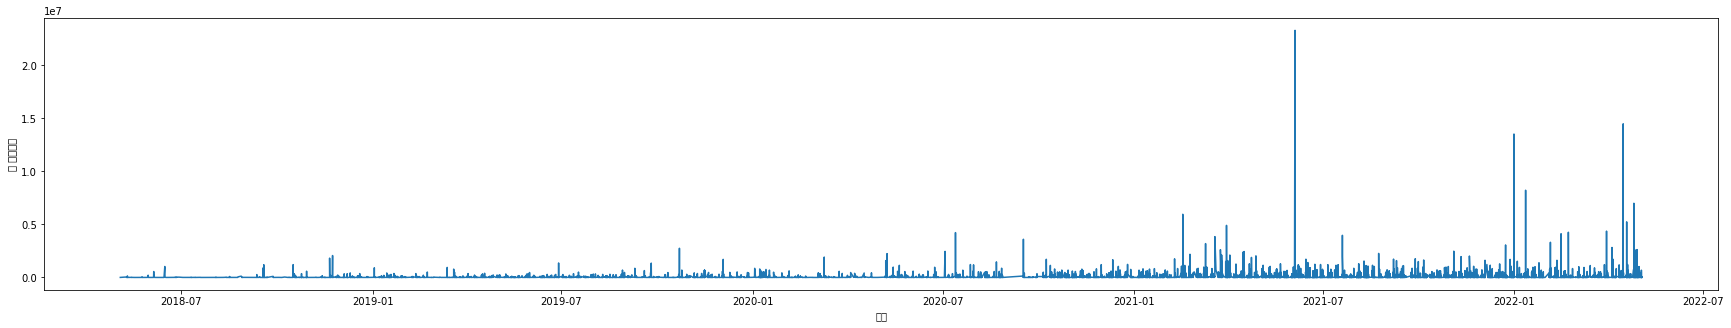

In [ ]:
plt.figure(figsize=(30, 5))
sns.lineplot(x="날짜", y="총 리드타임", data = df)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_te

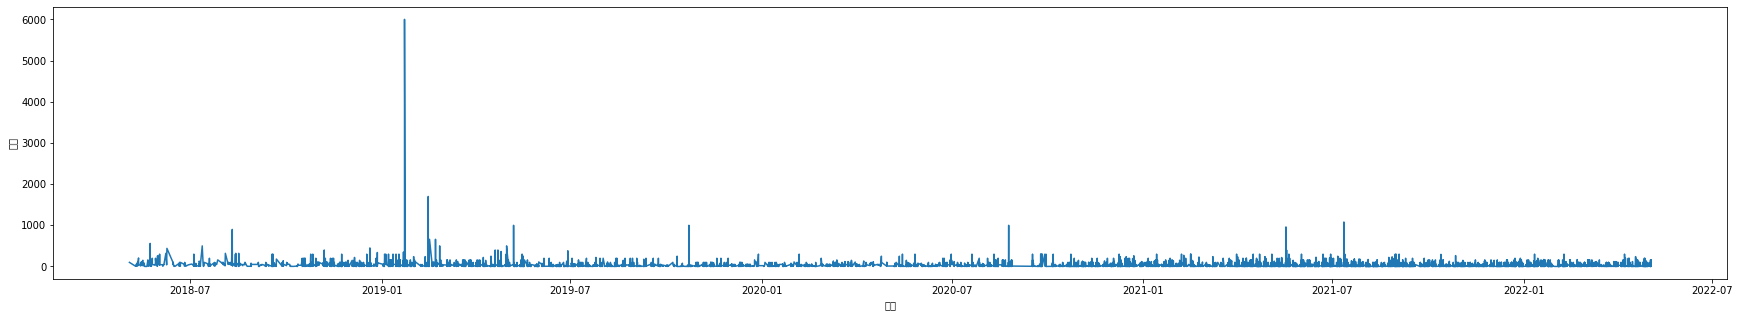

In [ ]:
plt.figure(figsize=(30, 5))
sns.lineplot(x="날짜", y="개수", data = df)
plt.show()

# => 품명(독립변수)를 보면

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44033 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48393 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_

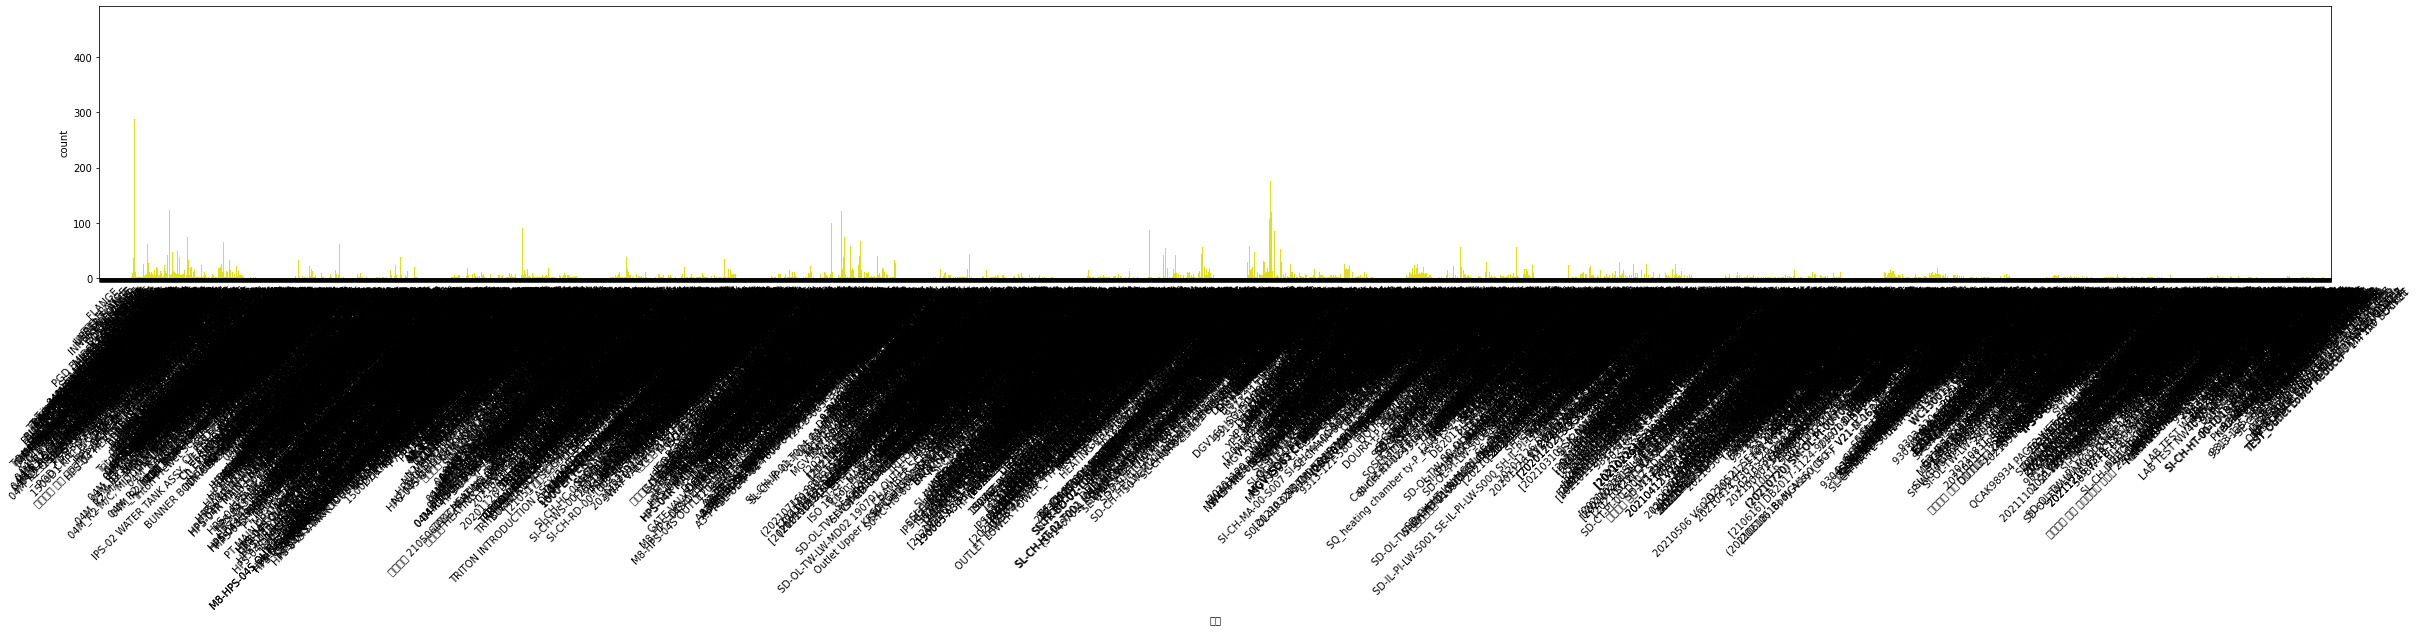

In [ ]:
plt.figure(figsize=(40, 5))
plt.xticks(rotation = 45)
sns.countplot(x = '품명', data=df, color = "yellow")
plt.show()

# => 공정(독립변수)를 보면 -> 이 밑은 같은 제품이 같은 공정을 다룰때 다른 리드타임이 나오는 것으로 필요없다고 하신다.

# => 이 밑은 위의 내가 원하는 것을 이루기 위한 시각화
- 같은 제품인데 다른 공정별로 리트타임을 원한다. -> 이것을 하기 위해 탑 4개의 고객사의 3개의 제품을 추렸다(생산개수가 많은 것으로)

In [ ]:
# AY사  
df_SEAMLESS_PIPE_32A_Sch10s = df[(df["품명"] == "SEAMLESS PIPE 32A Sch10s") & (df["고객사"] == "AY")]

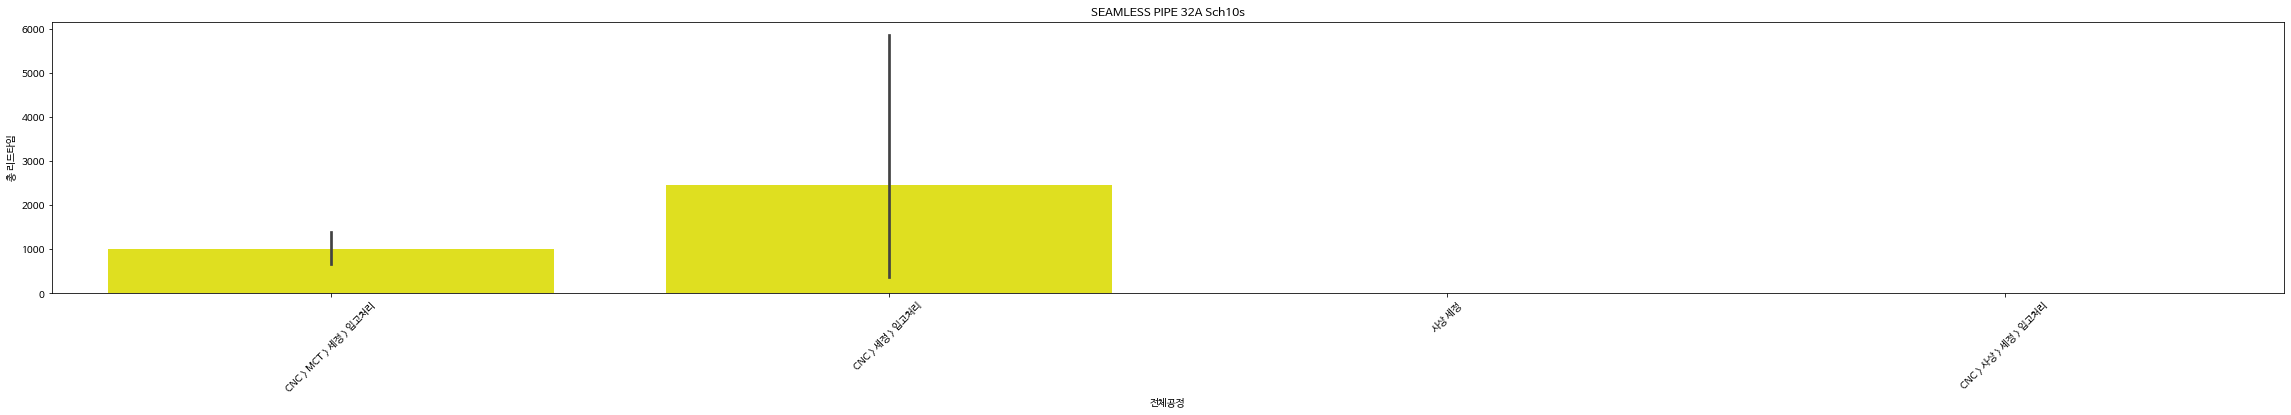

In [ ]:
plt.figure(figsize=(40, 5))
plt.xticks(rotation = 45)
plt.title("SEAMLESS PIPE 32A Sch10s")
sns.barplot(x = '전체공정', y = '총 리드타임', data=df_SEAMLESS_PIPE_32A_Sch10s, color = "yellow")
plt.show()

In [ ]:
df_UPPER_FLANGE = df[(df["품명"] == "UPPER FLANGE") & (df["고객사"] == "AY")]

In [ ]:
df_UPPER_FLANGE

,Unnamed: 0,LOTID,공정(번호),시차(초),개수,총 리드타임,날짜,품명(코드화),품명,전체공정,고객사
21,21.0,N1805040030100,3000.0,42840.500000,22.0,1947.295000,2018-05-10 14:17:19.397,AY-OLR-6SM11-01-1-01,UPPER FLANGE,CNC > 세정 > 입고처리,AY
46,46.0,N1805100060100,3000.0,48590.500000,50.0,971.810000,2018-05-23 14:57:51.710,AY-OLR-6SM11-01-1-01,UPPER FLANGE,CNC > 세정 > 입고처리,AY
48,48.0,N1805100090100,3000.0,61361.666667,37.0,1658.423333,2018-05-17 11:53:11.990,AY-OLP-6SM17-00-1-01,UPPER FLANGE,CNC > MCT > 세정 > 입고처리,AY
49,49.0,N1805100100100,3000.0,209541.500000,50.0,4190.830000,2018-05-21 15:06:05.570,AY-OLT-6SM12-01-1-01,UPPER FLANGE,CNC > 세정 > 입고처리,AY
67,67.0,N1805150040100,3000.0,88497.000000,50.0,1769.940000,2018-05-23 17:02:05.013,AY-WSL-SHM1W-01-1-01,UPPER FLANGE,CNC > 세정 > 입고처리,AY
...,...,...,...,...,...,...,...,...,...,...,...
36100,36100.0,N2204180410100,3000.0,137299.000000,40.0,3432.475000,2022-04-26 14:46:10.410,AY-WSL-4MSL0-00-1-01,UPPER FLANGE,CNC > 세정 > 입고처리,AY
36230,36230.0,N2204220460100,3000.0,138163.000000,40.0,3454.076667,2022-05-02 11:03:31.490,AY-HCB-4MRD0-01-1-01,UPPER FLANGE,CNC > MCT > 세정 > 입고처리,AY
36234,36234.0,N2204220500100,3000.0,55434.666667,10.0,5543.466667,2022-04-29 14:26:05.707,AY-HCB-4MRD0-01-1-01,UPPER FLANGE,CNC > MCT > 세정 > 입고처리,AY
36236,36236.0,N2204220520100,3000.0,9945.500000,10.0,994.550000,2022-04-28 13:57:09.407,AY-OPI-4MLR0-00-1-01,UPPER FLANGE,CNC > 세정 > 입고처리,AY


In [ ]:
df_UPPER_FLANGE.groupby("전체공정").mean()

,Unnamed: 0,공정(번호),시차(초),개수,총 리드타임
전체공정,,,,,
CNC > MCT > 세정 > 입고처리,16446.124183,2967.320261,107044.612200,29.021786,6710.793791
CNC > 세정 > 입고처리,15904.243243,3004.504505,125637.781532,31.002252,5088.488604
MCT > 세정 > 입고처리,29804.500000,3562.500000,139403.687500,20.375000,5376.555000
사상 세정,1161.500000,2500.000000,212.000000,87.500000,2.492500


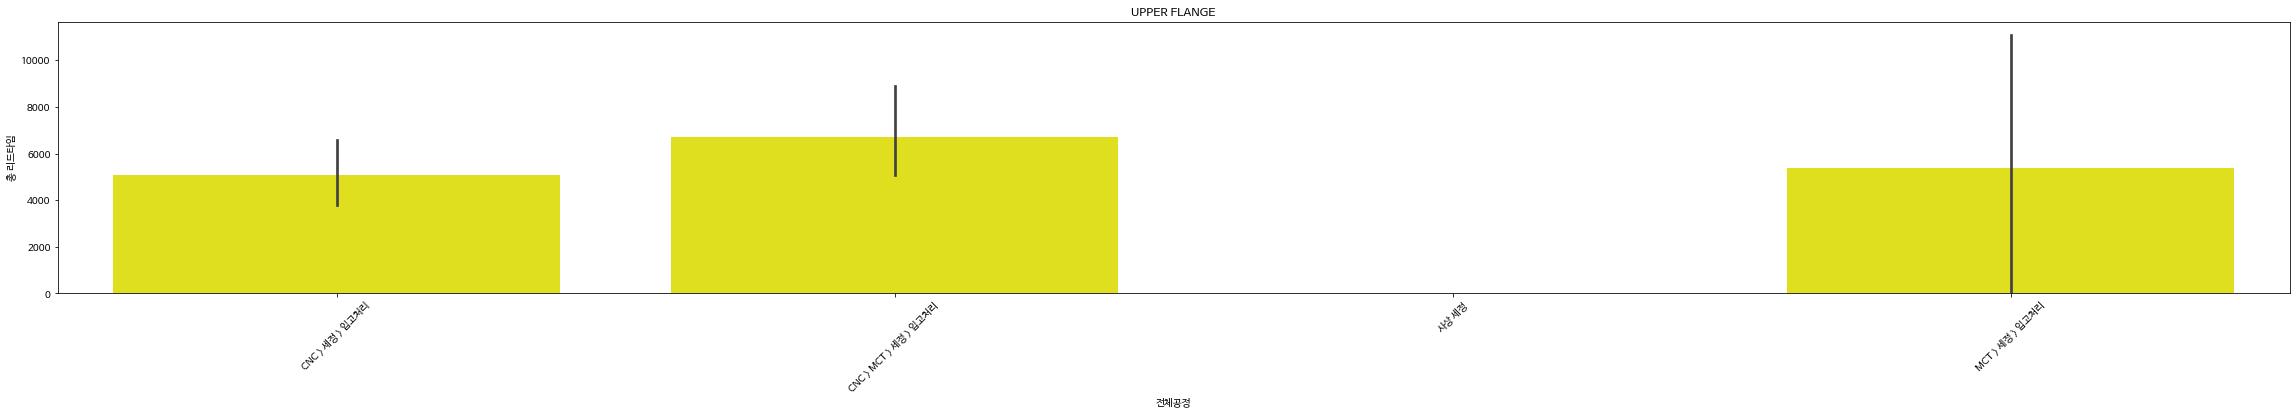

In [ ]:
plt.figure(figsize=(40, 5))
plt.xticks(rotation = 45)
plt.title("UPPER FLANGE")
sns.barplot(x = '전체공정', y = '총 리드타임', data=df_UPPER_FLANGE, color = "yellow")
plt.show()

In [ ]:
df_BOTTOM_FLANGE = df[(df["품명"] == "BOTTOM FLANGE")& (df["고객사"] == "AY")]

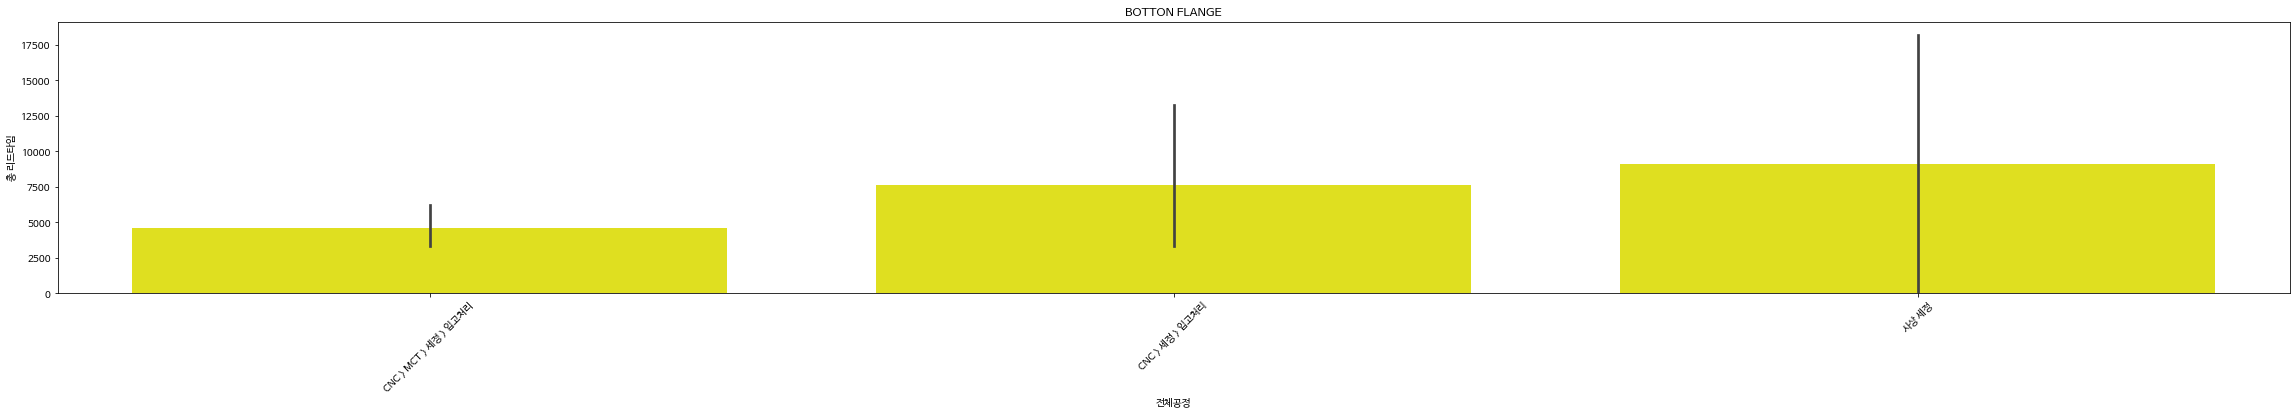

In [ ]:
plt.figure(figsize=(40, 5))
plt.xticks(rotation = 45)
plt.title("BOTTON FLANGE")
sns.barplot(x = '전체공정', y = '총 리드타임', data=df_BOTTOM_FLANGE, color = "yellow")
plt.show()

In [ ]:
#BU
df_CATHODE = df[(df["품명"] == "CATHODE") & (df["고객사"] == "BU")]

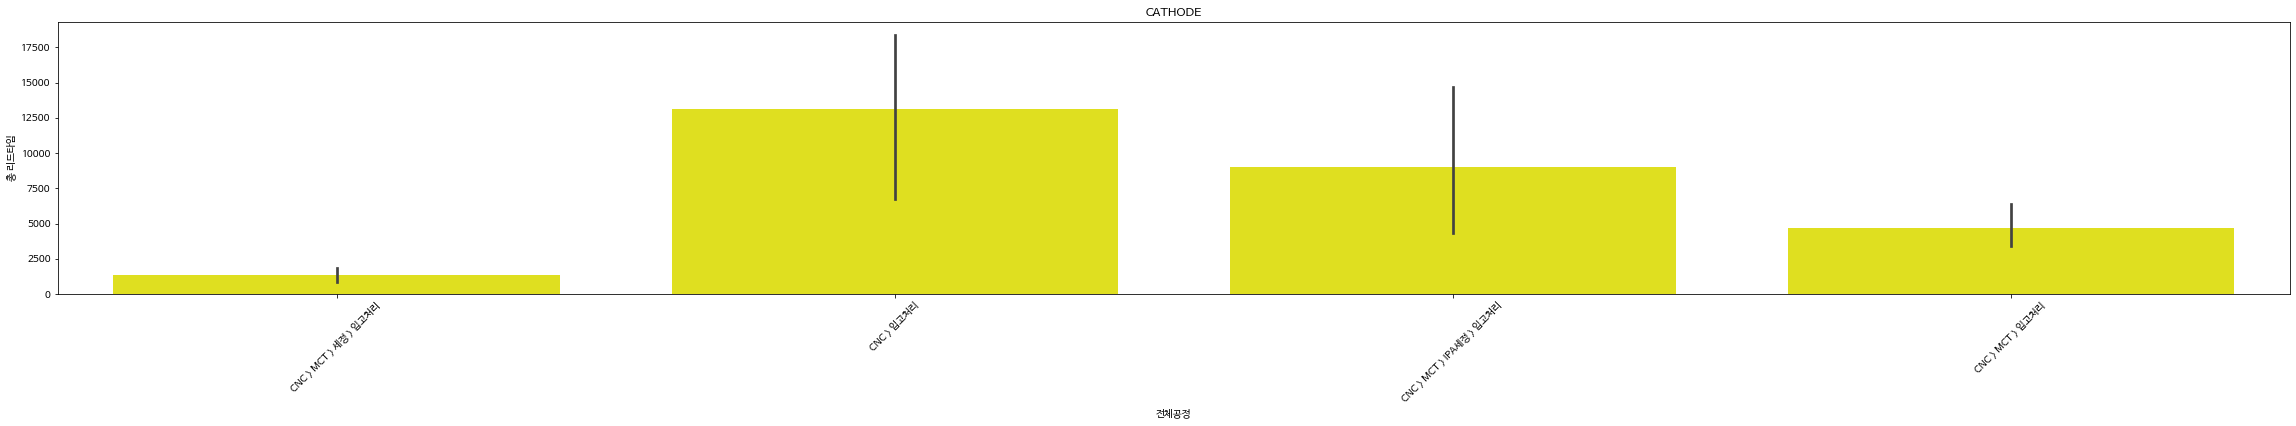

In [ ]:
plt.figure(figsize=(40, 5))
plt.xticks(rotation = 45)
plt.title("CATHODE")
sns.barplot(x = '전체공정', y = '총 리드타임', data=df_CATHODE, color = "yellow")
plt.show()

In [ ]:
df_CH_SLID_Lift_Base_Upper_2 = df[(df["품명"] == "CH SLID Lift Base Upper-2") & (df["고객사"] == "BU")]

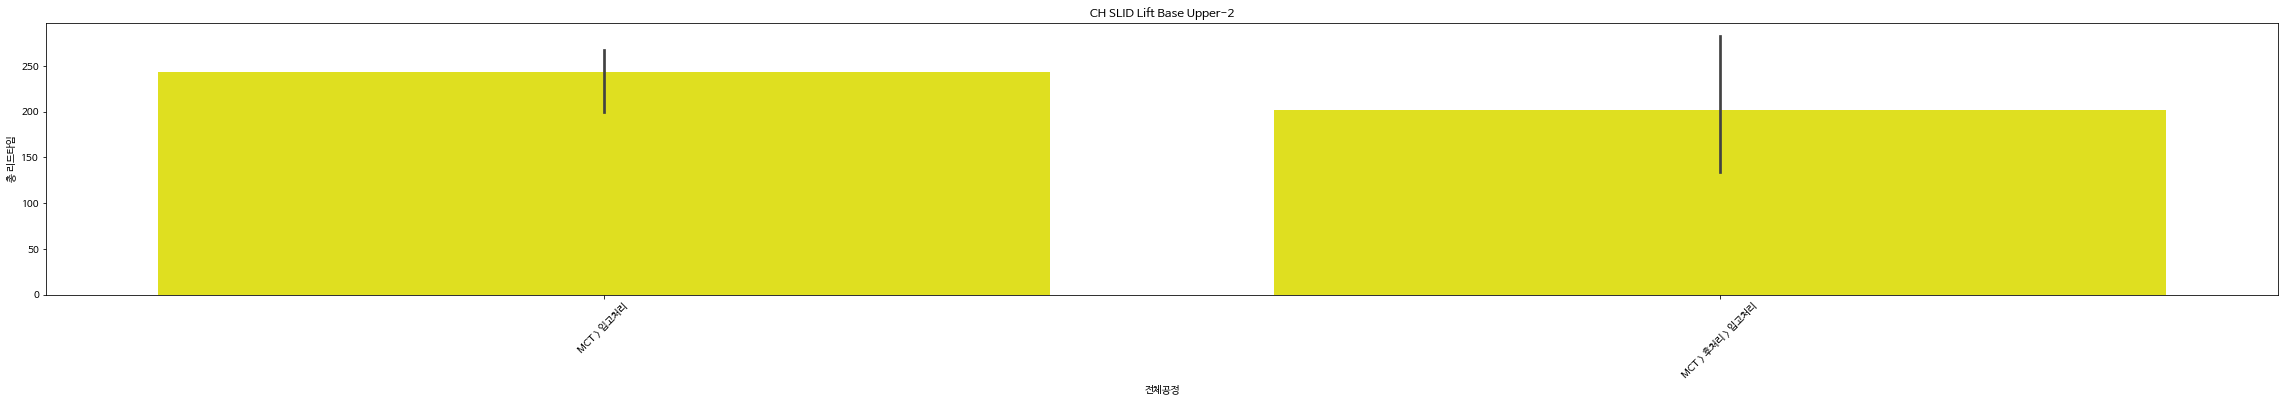

In [ ]:
plt.figure(figsize=(40, 5))
plt.xticks(rotation = 45)
plt.title("CH SLID Lift Base Upper-2")
sns.barplot(x = '전체공정', y = '총 리드타임', data=df_CH_SLID_Lift_Base_Upper_2, color = "yellow")
plt.show()

In [ ]:
df_CH_EPS_WORM_COVER_1 = df[(df["품명"] == "CH EPS WORM COVER-1") & (df["고객사"] == "BU")]

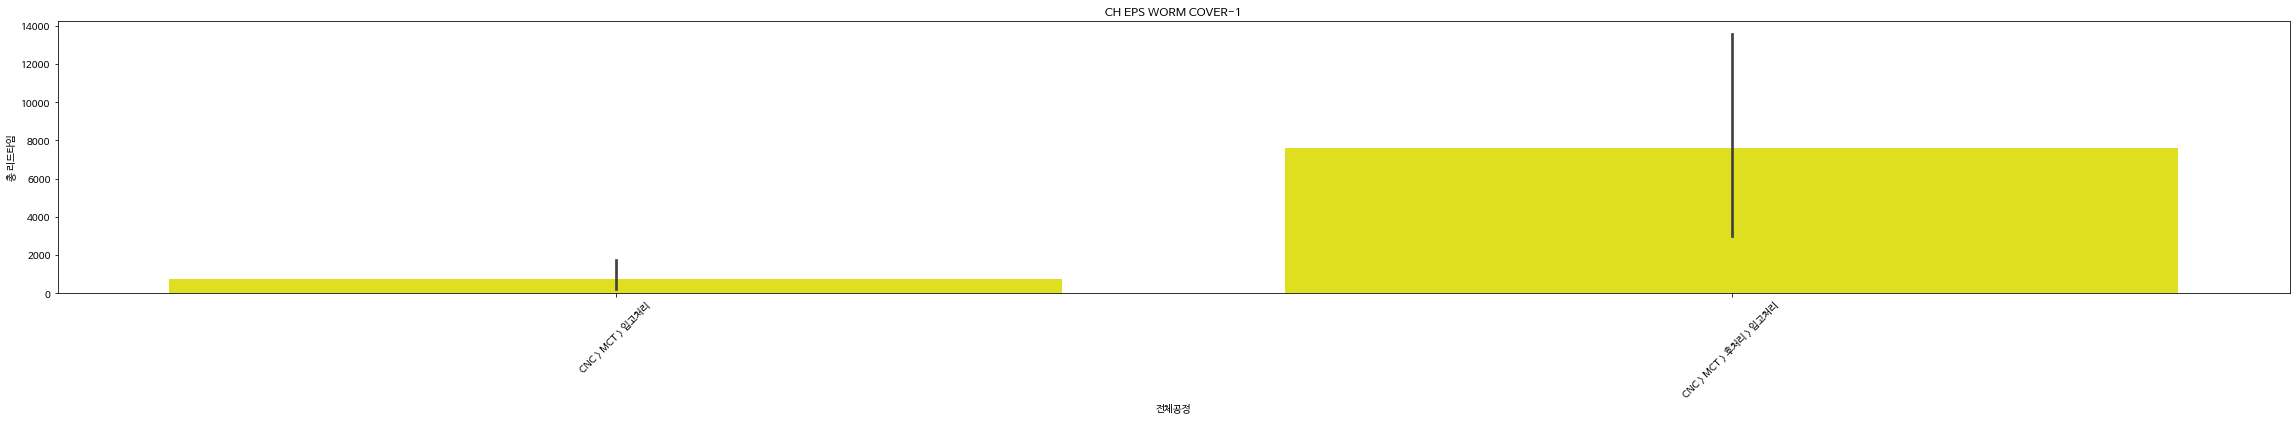

In [ ]:
plt.figure(figsize=(40, 5))
plt.xticks(rotation = 45)
plt.title("CH EPS WORM COVER-1")
sns.barplot(x = '전체공정', y = '총 리드타임', data=df_CH_EPS_WORM_COVER_1, color = "yellow")
plt.show()

In [ ]:
# DP사
df_Rib = df[(df["품명"] == "Rib") & (df["고객사"] == "DP")]

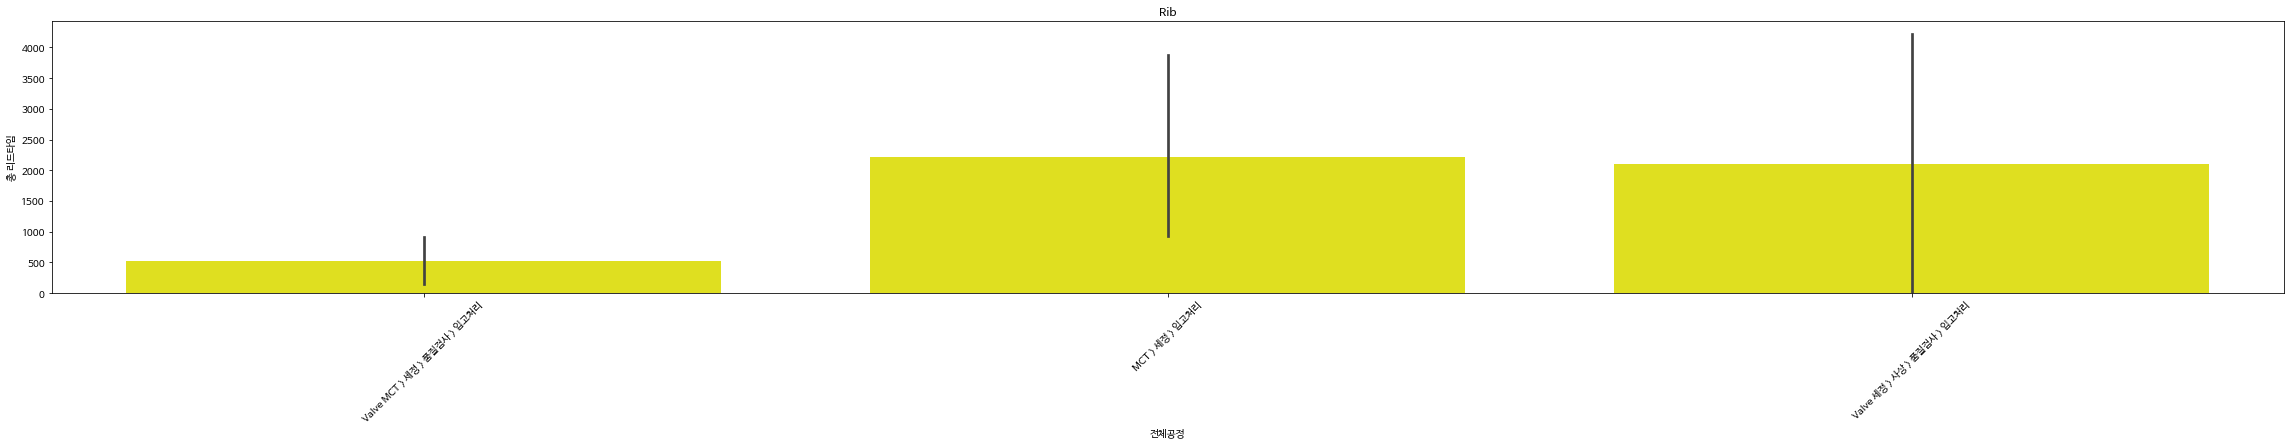

In [ ]:
plt.figure(figsize=(40, 5))
plt.xticks(rotation = 45)
plt.title("Rib")
sns.barplot(x = '전체공정', y = '총 리드타임', data=df_Rib, color = "yellow")
plt.show()

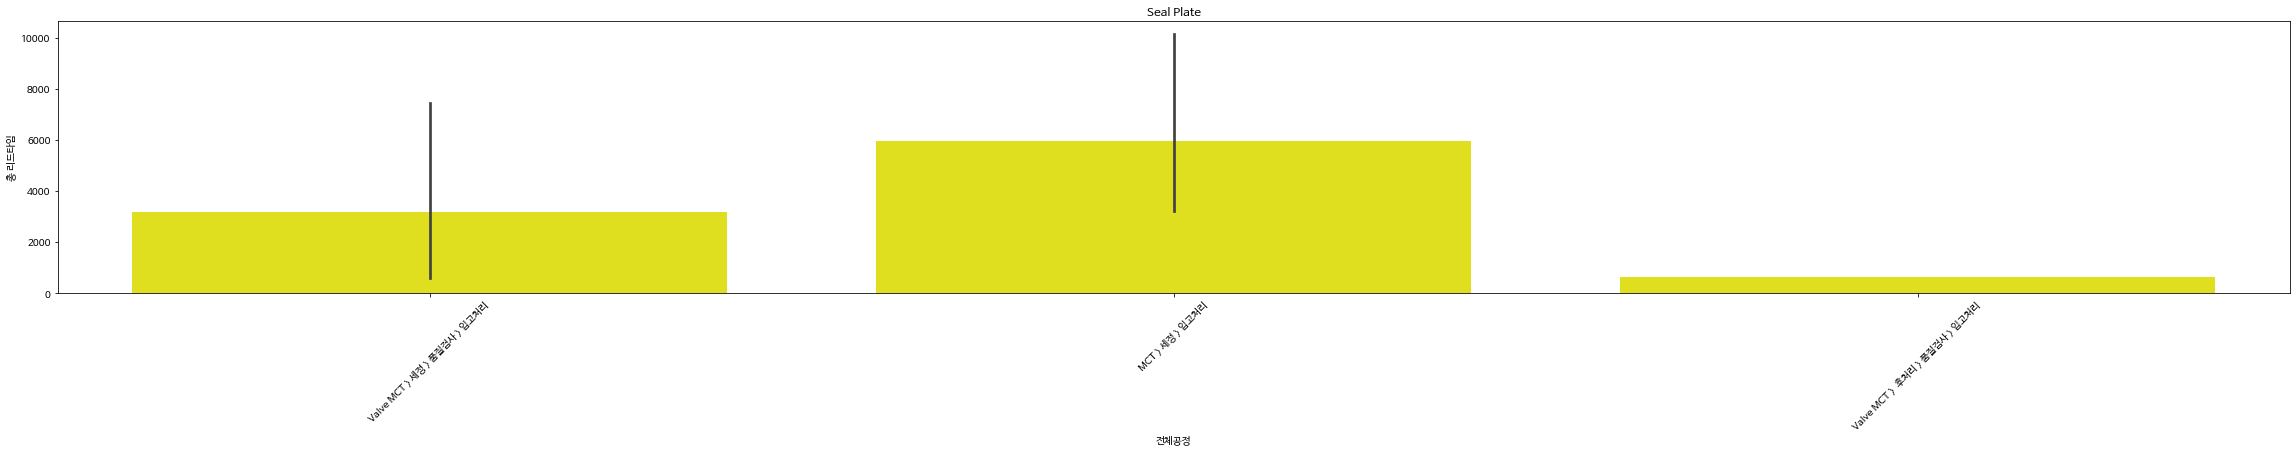

In [ ]:
df_Seal_Plate = df[(df["품명"] == "Seal Plate") & (df["고객사"] == "DP")]
plt.figure(figsize=(40, 5))
plt.xticks(rotation = 45)
plt.title("Seal Plate")
sns.barplot(x = '전체공정', y = '총 리드타임', data=df_Seal_Plate, color = "yellow")
plt.show()

In [ ]:
df_Bearing_Fixer = df[(df["품명"] == "Bearing Fixer") & (df["고객사"] == "DP")]

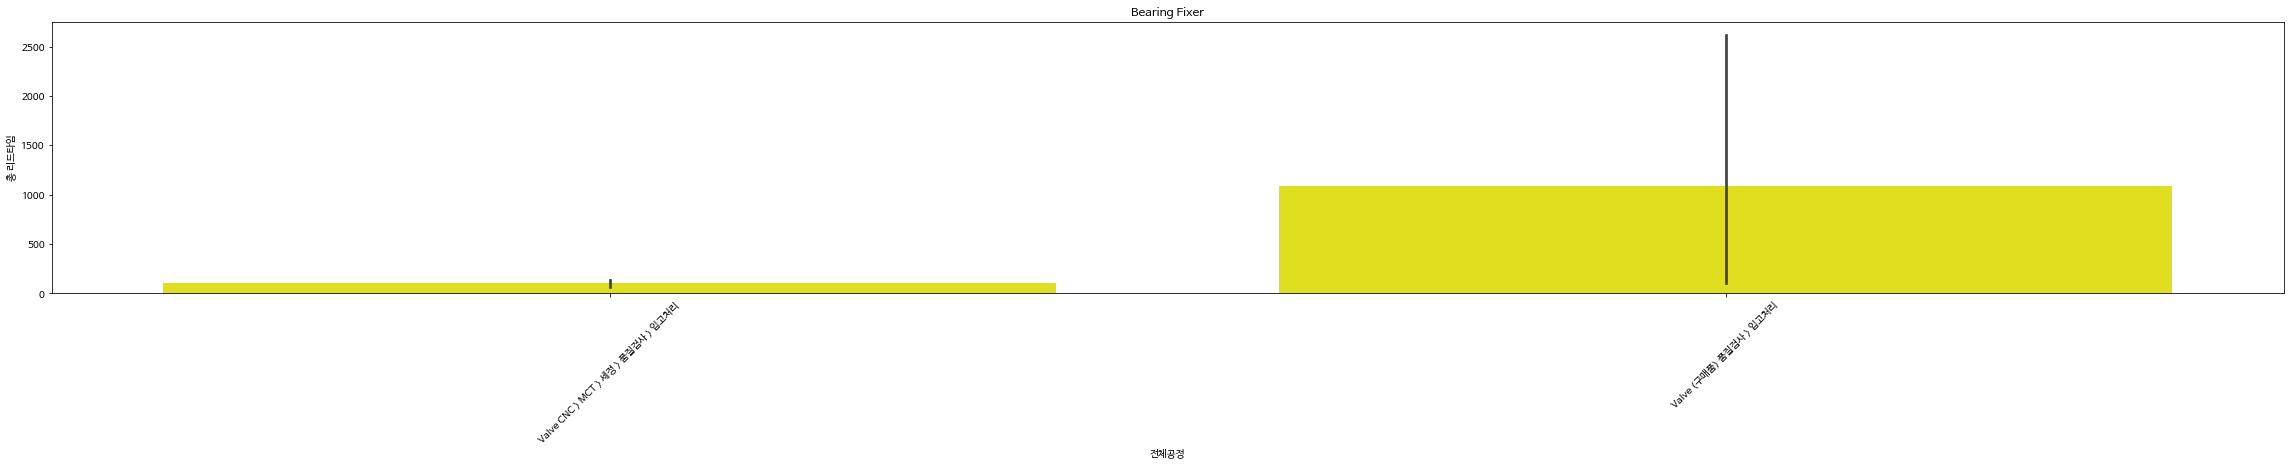

In [ ]:
plt.figure(figsize=(40, 5))
plt.xticks(rotation = 45)
plt.title("Bearing Fixer")
sns.barplot(x = '전체공정', y = '총 리드타임', data=df_Bearing_Fixer, color = "yellow")
plt.show()

In [ ]:
df_Top_Blade_PART = df[(df["품명"] == "Top Blade PART") & (df["고객사"] == "ZD")]

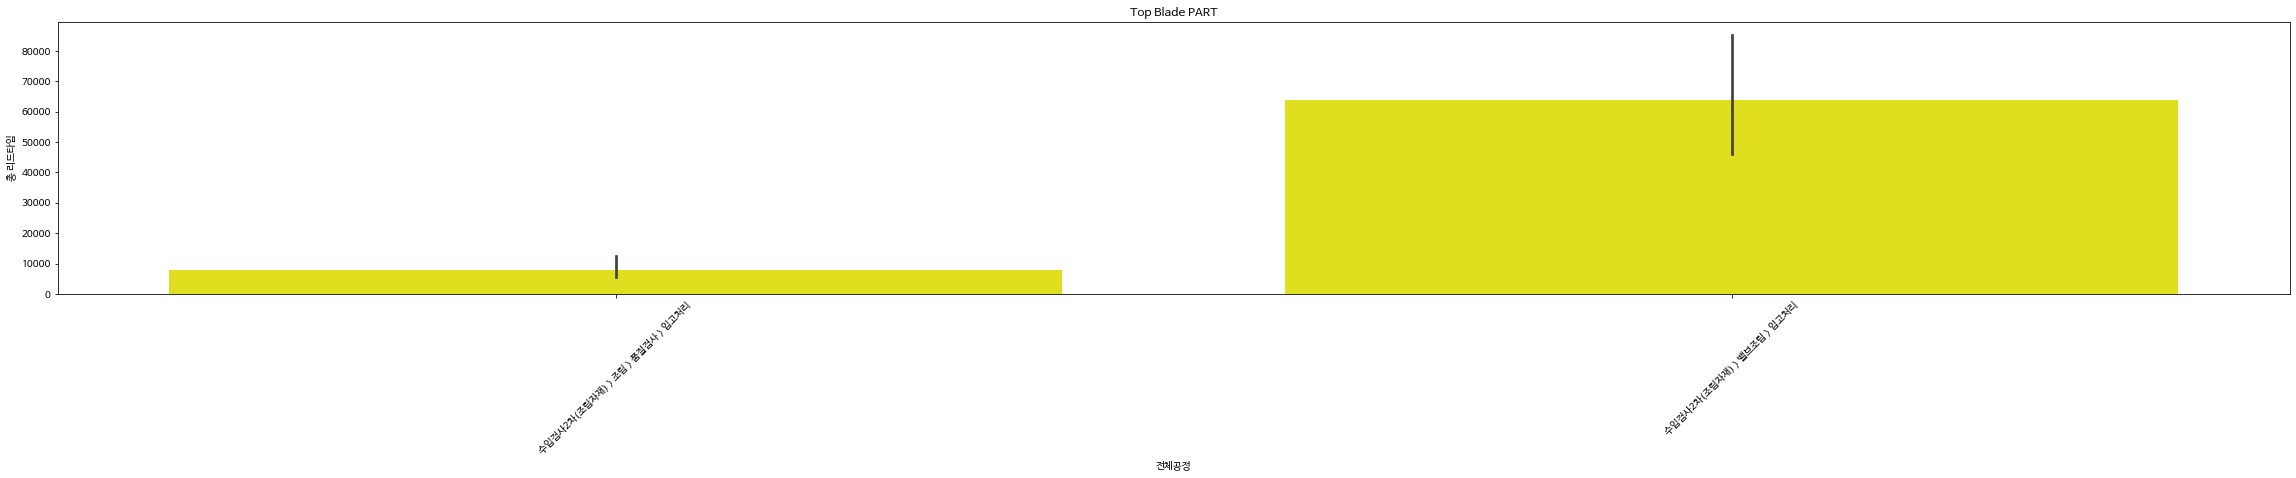

In [ ]:
plt.figure(figsize=(40, 5))
plt.xticks(rotation = 45)
plt.title("Top Blade PART")
sns.barplot(x = '전체공정', y = '총 리드타임', data=df_Top_Blade_PART, color = "yellow")
plt.show()

In [ ]:
df_Top_Blade = df[(df["품명"] == "Top Blade") & (df["고객사"] == "ZD")]

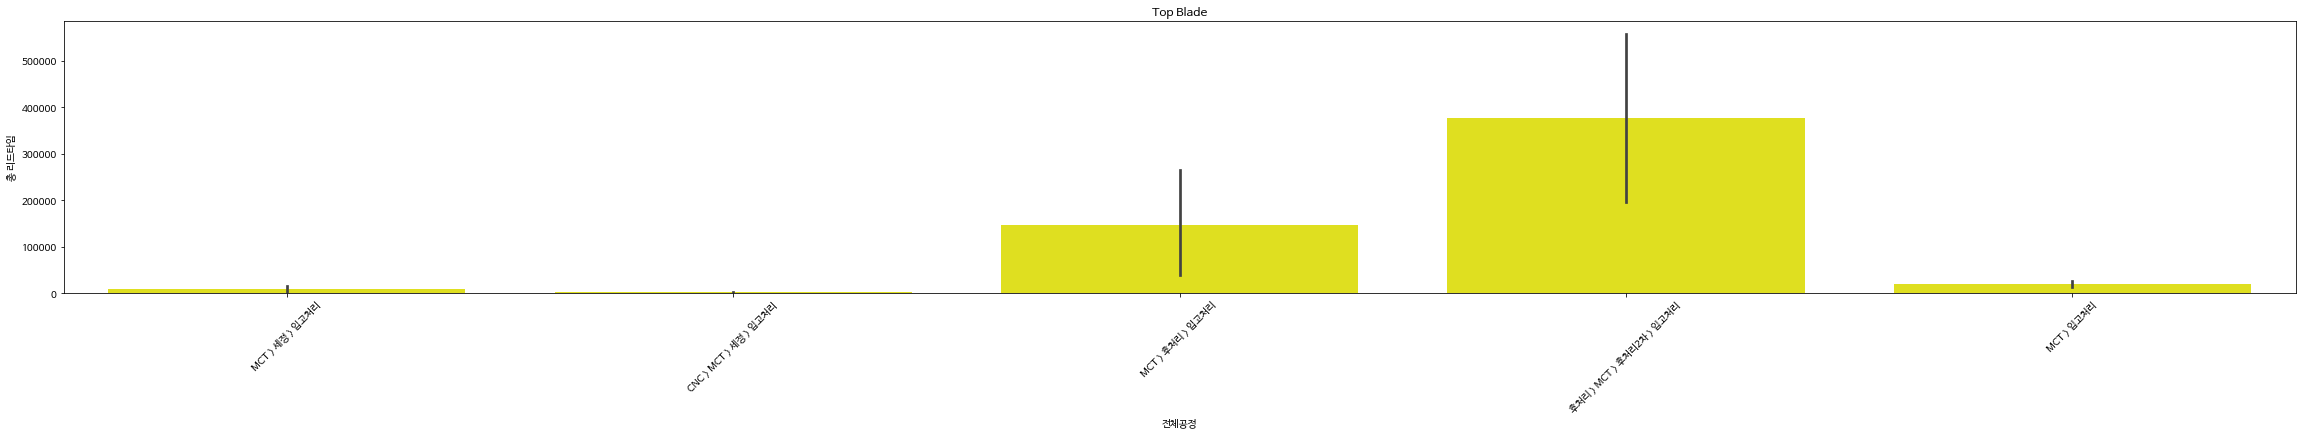

In [ ]:
plt.figure(figsize=(40, 5))
plt.xticks(rotation = 45)
plt.title("Top Blade")
sns.barplot(x = '전체공정', y = '총 리드타임', data=df_Top_Blade, color = "yellow")
plt.show()

In [ ]:
df_Bottom_Blade_w = df[(df["품명"] == "Bottom Blade w") & (df["고객사"] == "ZD")]

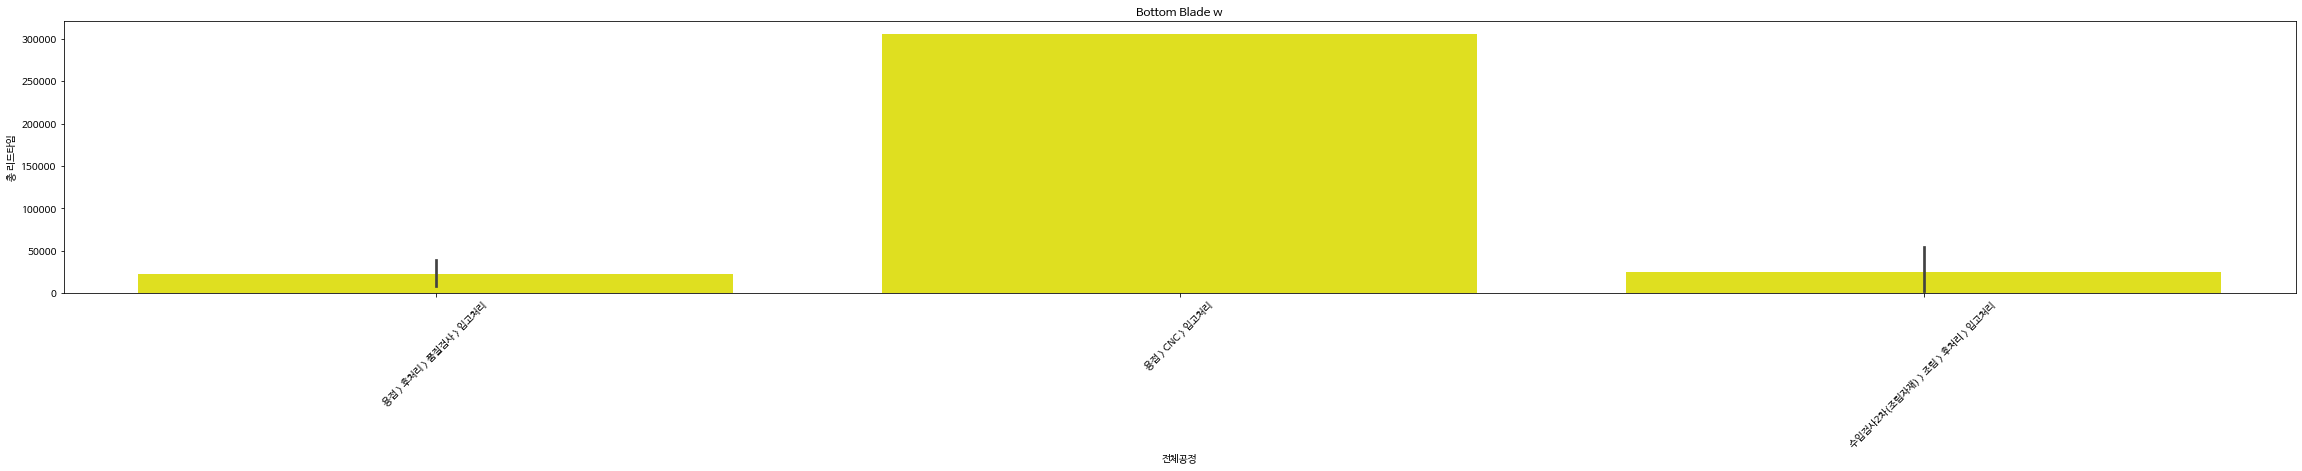

In [ ]:
plt.figure(figsize=(40, 5))
plt.xticks(rotation = 45)
plt.title("Bottom Blade w")
sns.barplot(x = '전체공정', y = '총 리드타임', data=df_Bottom_Blade_w, color = "yellow")
plt.show()